# Data Loading and pre processing

In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# declaring image folder path
data_path = '/content/drive/MyDrive/Colab Notebooks/Osteosercoma/Sorted Dataset'

In [ ]:
 # defining transformation
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root= data_path, transform= transforms)

In [ ]:
print("total samples in dataset: ", len(dataset))

total samples in dataset:  1144


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
num_workers = 0
batch_size = 16

# obtain training indices that will be used for validation
valid_size= 0.2 # taking 20% data as our test set
num_data = len(dataset)
indices = list(range(num_data))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_data))
train_idx, test_idx = indices[split:], indices[:split]

print('After splitting train data: ',len(train_idx))
print('After splitting test data: ',len(test_idx))

# define samplers for obtaining training and test batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)
# image classes
classes = ['Non-Tumor', 'Non-Viable-Tumor', 'Viable']

After splitting train data:  916
After splitting test data:  228


In [ ]:
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

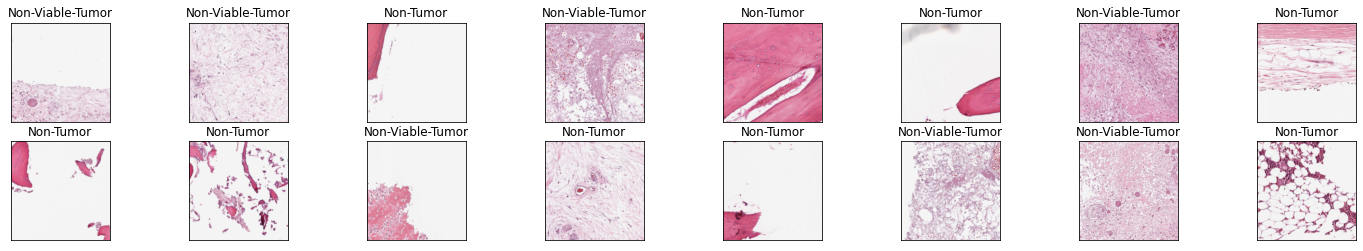

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # Converted Image to numpy

# plot the images in the batch, along with the corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
# Taking vgg16 model 
from torchvision import models
resnet_50 = torchvision.models.resnet50(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
print(resnet_50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# freeze all the parameters of resnet 50 as 
for param in resnet_50.parameters():
    param.requires_grad = False

In [ ]:
from torchvision import models
from torchsummary import summary
summary(resnet_50, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
num_ftrs = resnet_50.fc.in_features
print("Numper of features: ", num_ftrs)

Numper of features:  2048


In [ ]:
import torch.nn as nn
# Above we can see that resnet50 provides 1000 out features
# we will extract 1024 features from this pre-trained model
# so, we need to modify fc layer
# we will replace this FC layer out features 1000 to 1024
# we can see that, above we have freeze all the weights because we wil be using transfer learning
# our added layers weights will be updated only
resnet_50.fc = nn.Linear(num_ftrs, 1024)

In [ ]:
model = resnet_50

In [ ]:
from torchvision import models
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

# Training Model

In [ ]:
# import torch.optim as optim
# # optimizer
# # Observe that only parameters of final layer are being optimized as
# optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9 ) #weight_decay= 5e-4
# # optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001, betas= (0.9, 0.999), eps= 1e-8, weight_decay=0)
# # loss function
# criterion = nn.CrossEntropyLoss()

In [ ]:
# # train for some epochs 
# # number of epochs to train the model
# n_epochs = 10

# # using test set as validation set
# valid_loader = test_loader

# valid_loss_min = np.Inf # track change in validation loss

# valid_list= []  # stores validation losses
# train_list= []  # stores train losses

# valid_acc = [] # store validation accuracy
# train_acc = [] # store train accuracy

# for epoch in range(1, n_epochs+1):

#     # keep track of training, validation loss and accuracy
#     train_loss = 0.0
#     valid_loss = 0.0
#     train_corrects = 0
#     val_corrects = 0

#     # trianing the model
#     model.train()
#     for data, target in train_loader:
#         # move tensors to GPU if CUDA is available
#         if torch.cuda.is_available():
#             data, target = data.cuda(), target.cuda()

#         optimizer.zero_grad()
#         output = model(data)
#         _,preds = torch.max(output, 1)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()*data.size(0)
#         train_corrects += torch.sum(preds == target.data)
        
          
#     # validate the model 
#     model.eval()
#     for data, target in valid_loader:
#         # move tensors to GPU if CUDA is available
#         if torch.cuda.is_available():
#             data, target = data.cuda(), target.cuda()
        
#         output = model(data)
#         _,preds = torch.max(output, 1)
#         loss = criterion(output, target)
#         valid_loss += loss.item()*data.size(0)
#         val_corrects += torch.sum(preds == target.data) 
    
#     # calculate average losses
#     train_loss = train_loss/len(train_loader.sampler)
#     valid_loss = valid_loss/len(valid_loader.sampler)
#     # calculate accuracy
#     t_acc = train_corrects/len(train_loader.sampler)
#     v_acc = val_corrects/len(valid_loader.sampler)
        
#     # print training/validation statistics 
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTrain Acc: {:4f} \tValidation Acc: {:4f}'.format(
#         epoch, train_loss, valid_loss, t_acc, v_acc))
    
#     # Using Schedular step
#     # scheduler.step()
    
#     # save model if validation loss has decreased
#     if valid_loss <= valid_loss_min:
#         print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
#         valid_loss_min,
#         valid_loss))
#         torch.save(model.state_dict(), 'osteosercoma_resnet_50.pt')
#         valid_loss_min = valid_loss
    
#     #storing train and validation looses
#     train_list.append(train_loss)
#     valid_list.append(valid_loss)
#     # storing train and validartion accuracy
#     train_acc.append(t_acc)
#     valid_acc.append(v_acc)

In [ ]:
# # load best model
# # trained_model = model.load_state_dict(torch.load('osteosercoma_resnet_50.pt'))
# model.load_state_dict(torch.load('osteosercoma_resnet_50.pt'))

# Making training and testing features for ML Algorithm

In [ ]:
# feature extraction for training images

x_train = []
y_train = []
model.eval()
for data, target in train_loader:
  # move tensors to GPU if CUDA is available
  if torch.cuda.is_available():
    data, target = data.cuda(), target.cuda()
  output = model(data)
  x_train.append(output)

  if torch.cuda.is_available():
    target = torch.tensor(target, device= 'cpu')
  target = target.numpy()
  target = target.astype(int)
  y_train.append(target)

In [ ]:
# feature extraction for test images 

x_test = []
y_test = []
model.eval()
for data, target in test_loader:
  # move tensors to GPU if CUDA is available
  if torch.cuda.is_available():
    data, target = data.cuda(), target.cuda()
  output = model(data)
  x_test.append(output)

  if torch.cuda.is_available():
    target = torch.tensor(target, device= 'cpu')

  target = target.numpy()
  target = target.astype(int)
  y_test.append(target)

In [ ]:
# As we are getting data from dataloader, so data are inserted as batch size
# that's why we need to convert this into 1D list 
from itertools import chain
x_train_features = list(chain.from_iterable(x_train))
x_test_features = list(chain.from_iterable(x_test))

print("Total training features: ", len(x_train_features))
print("Total test features: ", len(x_test_features))

Total training features:  916
Total test features:  228


In [ ]:
# converting labels into one dimensional list 
y_train = list(chain.from_iterable(y_train))
y_test = list(chain.from_iterable(y_test))

print("Total training labels: ", len(y_train))
print("Total test labels: ", len(y_test))

Total training labels:  916
Total test labels:  228


In [ ]:
for i in range(len(x_train_features)):
  # x_train_features[i] = x_train_features[i].numpy()
  if torch.cuda.is_available():
    x_train_features[i] = x_train_features[i].cpu().detach().numpy()   # if use GPU
  
  x_train_features[i] = x_train_features[i].detach().numpy()   # if use GPU
  
# converting list to numpy array
x_train_features = np.array(x_train_features)
print("Shape of training features: ",x_train_features.shape)

Shape of training features:  (916, 1024)


In [ ]:
for i in range(len(x_test_features)):
  # x_test_features[i] = x_test_features[i].numpy()
  if torch.cuda.is_available():
    x_test_features[i] = x_test_features[i].cpu().detach().numpy()

  x_test_features[i] = x_test_features[i].detach().numpy()

# converting list to numpy array
x_test_features = np.array(x_test_features)
print("Shape of test features: ",x_test_features.shape)

Shape of test features:  (228, 1024)


In [ ]:
#Convert label lists to arrays                
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Shape of training labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)

Shape of training labels:  (916,)
Shape of test labels:  (228,)


# ROC-AUC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
train_X = x_train_features
train_Y = y_train
test_X = x_test_features
test_Y = y_test

In [ ]:
# label binarize 
from sklearn.preprocessing import label_binarize
# for train labels 
train_Y = label_binarize(train_Y, classes=[0, 1, 2])
n_classes = train_Y.shape[1]
print(f"Number of class: {n_classes}")

# for test labels 
test_Y = label_binarize(test_Y, classes=[0,1,2])
n_classes = test_Y.shape[1]
print(f"Number of class: {n_classes}")

Number of class: 3
Number of class: 3


In [ ]:
# XGBoost
import xgboost as xgb

# Learn to predict each class against the other
xg_classifier = OneVsRestClassifier(
    xgb.XGBClassifier(learning_rate= 0.006)
)
y_score = xg_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
xg_fpr = dict()
xg_tpr = dict()
xg_roc_auc = dict()
for i in range(n_classes):
    xg_fpr[i], xg_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    xg_roc_auc[i] = auc(xg_fpr[i], xg_tpr[i])

# Compute micro-average ROC curve and ROC area
xg_fpr["micro"], xg_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
xg_roc_auc["micro"] = auc(xg_fpr["micro"], xg_tpr["micro"])

# getting micro average 
print(f"Micro average: {xg_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
xg_all_fpr = np.unique(np.concatenate([xg_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
xg_mean_tpr = np.zeros_like(xg_all_fpr)
for i in range(n_classes):
    xg_mean_tpr += np.interp(xg_all_fpr, xg_fpr[i], xg_tpr[i])

# Finally average it and compute AUC
xg_mean_tpr /= n_classes

xg_fpr["macro"] = xg_all_fpr
xg_tpr["macro"] = xg_mean_tpr
xg_roc_auc["macro"] = auc(xg_fpr["macro"], xg_tpr["macro"])

print(f"Macro average ROC: {xg_roc_auc['macro']}")

Micro average: 0.9482965912588488
Macro average ROC: 0.9455854281882847


In [ ]:
# For Decision tree
from sklearn.tree import DecisionTreeClassifier

# Learn to predict each class against the other
dt_classifier = OneVsRestClassifier(
    DecisionTreeClassifier(max_depth =7, random_state = 42)
)
y_score = dt_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

# Compute micro-average ROC curve and ROC area
dt_fpr["micro"], dt_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
dt_roc_auc["micro"] = auc(dt_fpr["micro"], dt_tpr["micro"])

# getting micro average 
print(f"Micro average: {dt_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
dt_all_fpr = np.unique(np.concatenate([dt_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
dt_mean_tpr = np.zeros_like(dt_all_fpr)
for i in range(n_classes):
    dt_mean_tpr += np.interp(dt_all_fpr, dt_fpr[i], dt_tpr[i])

# Finally average it and compute AUC
dt_mean_tpr /= n_classes

dt_fpr["macro"] = dt_all_fpr
dt_tpr["macro"] = dt_mean_tpr
dt_roc_auc["macro"] = auc(dt_fpr["macro"], dt_tpr["macro"])

print(f"Macro average ROC: {dt_roc_auc['macro']}")

Micro average: 0.7622537703908896
Macro average ROC: 0.7346339611293438


In [ ]:
# for Random Forest 
# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Learn to predict each class against the other
rf_classifier = OneVsRestClassifier(
    RandomForestClassifier(n_estimators = 16, criterion = 'gini',ccp_alpha=0.05, random_state = 42)
)
y_score = rf_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    rf_roc_auc[i] = auc(rf_fpr[i], rf_tpr[i])

# Compute micro-average ROC curve and ROC area
rf_fpr["micro"], rf_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
rf_roc_auc["micro"] = auc(rf_fpr["micro"], rf_tpr["micro"])

# getting micro average 
print(f"Micro average: {rf_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
rf_all_fpr = np.unique(np.concatenate([rf_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
rf_mean_tpr = np.zeros_like(rf_all_fpr)
for i in range(n_classes):
    rf_mean_tpr += np.interp(rf_all_fpr, rf_fpr[i], rf_tpr[i])

# Finally average it and compute AUC
rf_mean_tpr /= n_classes

rf_fpr["macro"] = rf_all_fpr
rf_tpr["macro"] = rf_mean_tpr
rf_roc_auc["macro"] = auc(rf_fpr["macro"], rf_tpr["macro"])

print(f"Macro average ROC: {rf_roc_auc['macro']}")

Micro average: 0.8923611111111109
Macro average ROC: 0.8993564019957629


In [ ]:
# For LGBM 
from lightgbm import LGBMClassifier

# Learn to predict each class against the other
lgbm_classifier = OneVsRestClassifier(
    LGBMClassifier(learning_rate= 0.005)
)
y_score = lgbm_classifier.fit(train_X, train_Y).predict_proba(test_X)

 # Compute ROC curve and ROC area for each class
lgbm_fpr = dict()
lgbm_tpr = dict()
lgbm_roc_auc = dict()
for i in range(n_classes):
    lgbm_fpr[i], lgbm_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    lgbm_roc_auc[i] = auc(lgbm_fpr[i], lgbm_tpr[i])

# Compute micro-average ROC curve and ROC area
lgbm_fpr["micro"], lgbm_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
lgbm_roc_auc["micro"] = auc(lgbm_fpr["micro"], lgbm_tpr["micro"])

# getting micro average 
print(f"Micro average: {lgbm_roc_auc['micro']}")

# macro average 
# First aggregate all false positive rates
lgbm_all_fpr = np.unique(np.concatenate([lgbm_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
lgbm_mean_tpr = np.zeros_like(lgbm_all_fpr)
for i in range(n_classes):
    lgbm_mean_tpr += np.interp(lgbm_all_fpr, lgbm_fpr[i], lgbm_tpr[i])

# Finally average it and compute AUC
lgbm_mean_tpr /= n_classes

lgbm_fpr["macro"] = lgbm_all_fpr
lgbm_tpr["macro"] = lgbm_mean_tpr
lgbm_roc_auc["macro"] = auc(lgbm_fpr["macro"], lgbm_tpr["macro"])

print(f"Macro average ROC: {lgbm_roc_auc['macro']}")

Micro average: 0.943771160357033
Macro average ROC: 0.9615864136966391


In [ ]:
from sklearn.neural_network import MLPClassifier
# Learn to predict each class against the other
mlp_classifier = OneVsRestClassifier(
    MLPClassifier(random_state=1, max_iter=200)
)
y_score = mlp_classifier.fit(train_X, train_Y).predict_proba(test_X)

# Compute ROC curve and ROC area for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()
for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

# Compute micro-average ROC curve and ROC area
mlp_fpr["micro"], mlp_tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
mlp_roc_auc["micro"] = auc(mlp_fpr["micro"], mlp_tpr["micro"])

print(f"Micro average: {mlp_roc_auc['micro']}")

# First aggregate all false positive rates
mlp_all_fpr = np.unique(np.concatenate([mlp_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mlp_mean_tpr = np.zeros_like(mlp_all_fpr)
for i in range(n_classes):
    mlp_mean_tpr += np.interp(mlp_all_fpr, mlp_fpr[i], mlp_tpr[i])

# Finally average it and compute AUC
mlp_mean_tpr /= n_classes

mlp_fpr["macro"] = mlp_all_fpr
mlp_tpr["macro"] = mlp_mean_tpr
mlp_roc_auc["macro"] = auc(mlp_fpr["macro"], mlp_tpr["macro"])

print(f"ROC Macro: {mlp_roc_auc['macro']}")
print(f"Micro average: {mlp_roc_auc['micro']}")

Micro average: 0.9739727608494921
ROC Macro: 0.9731659416454741
Micro average: 0.9739727608494921


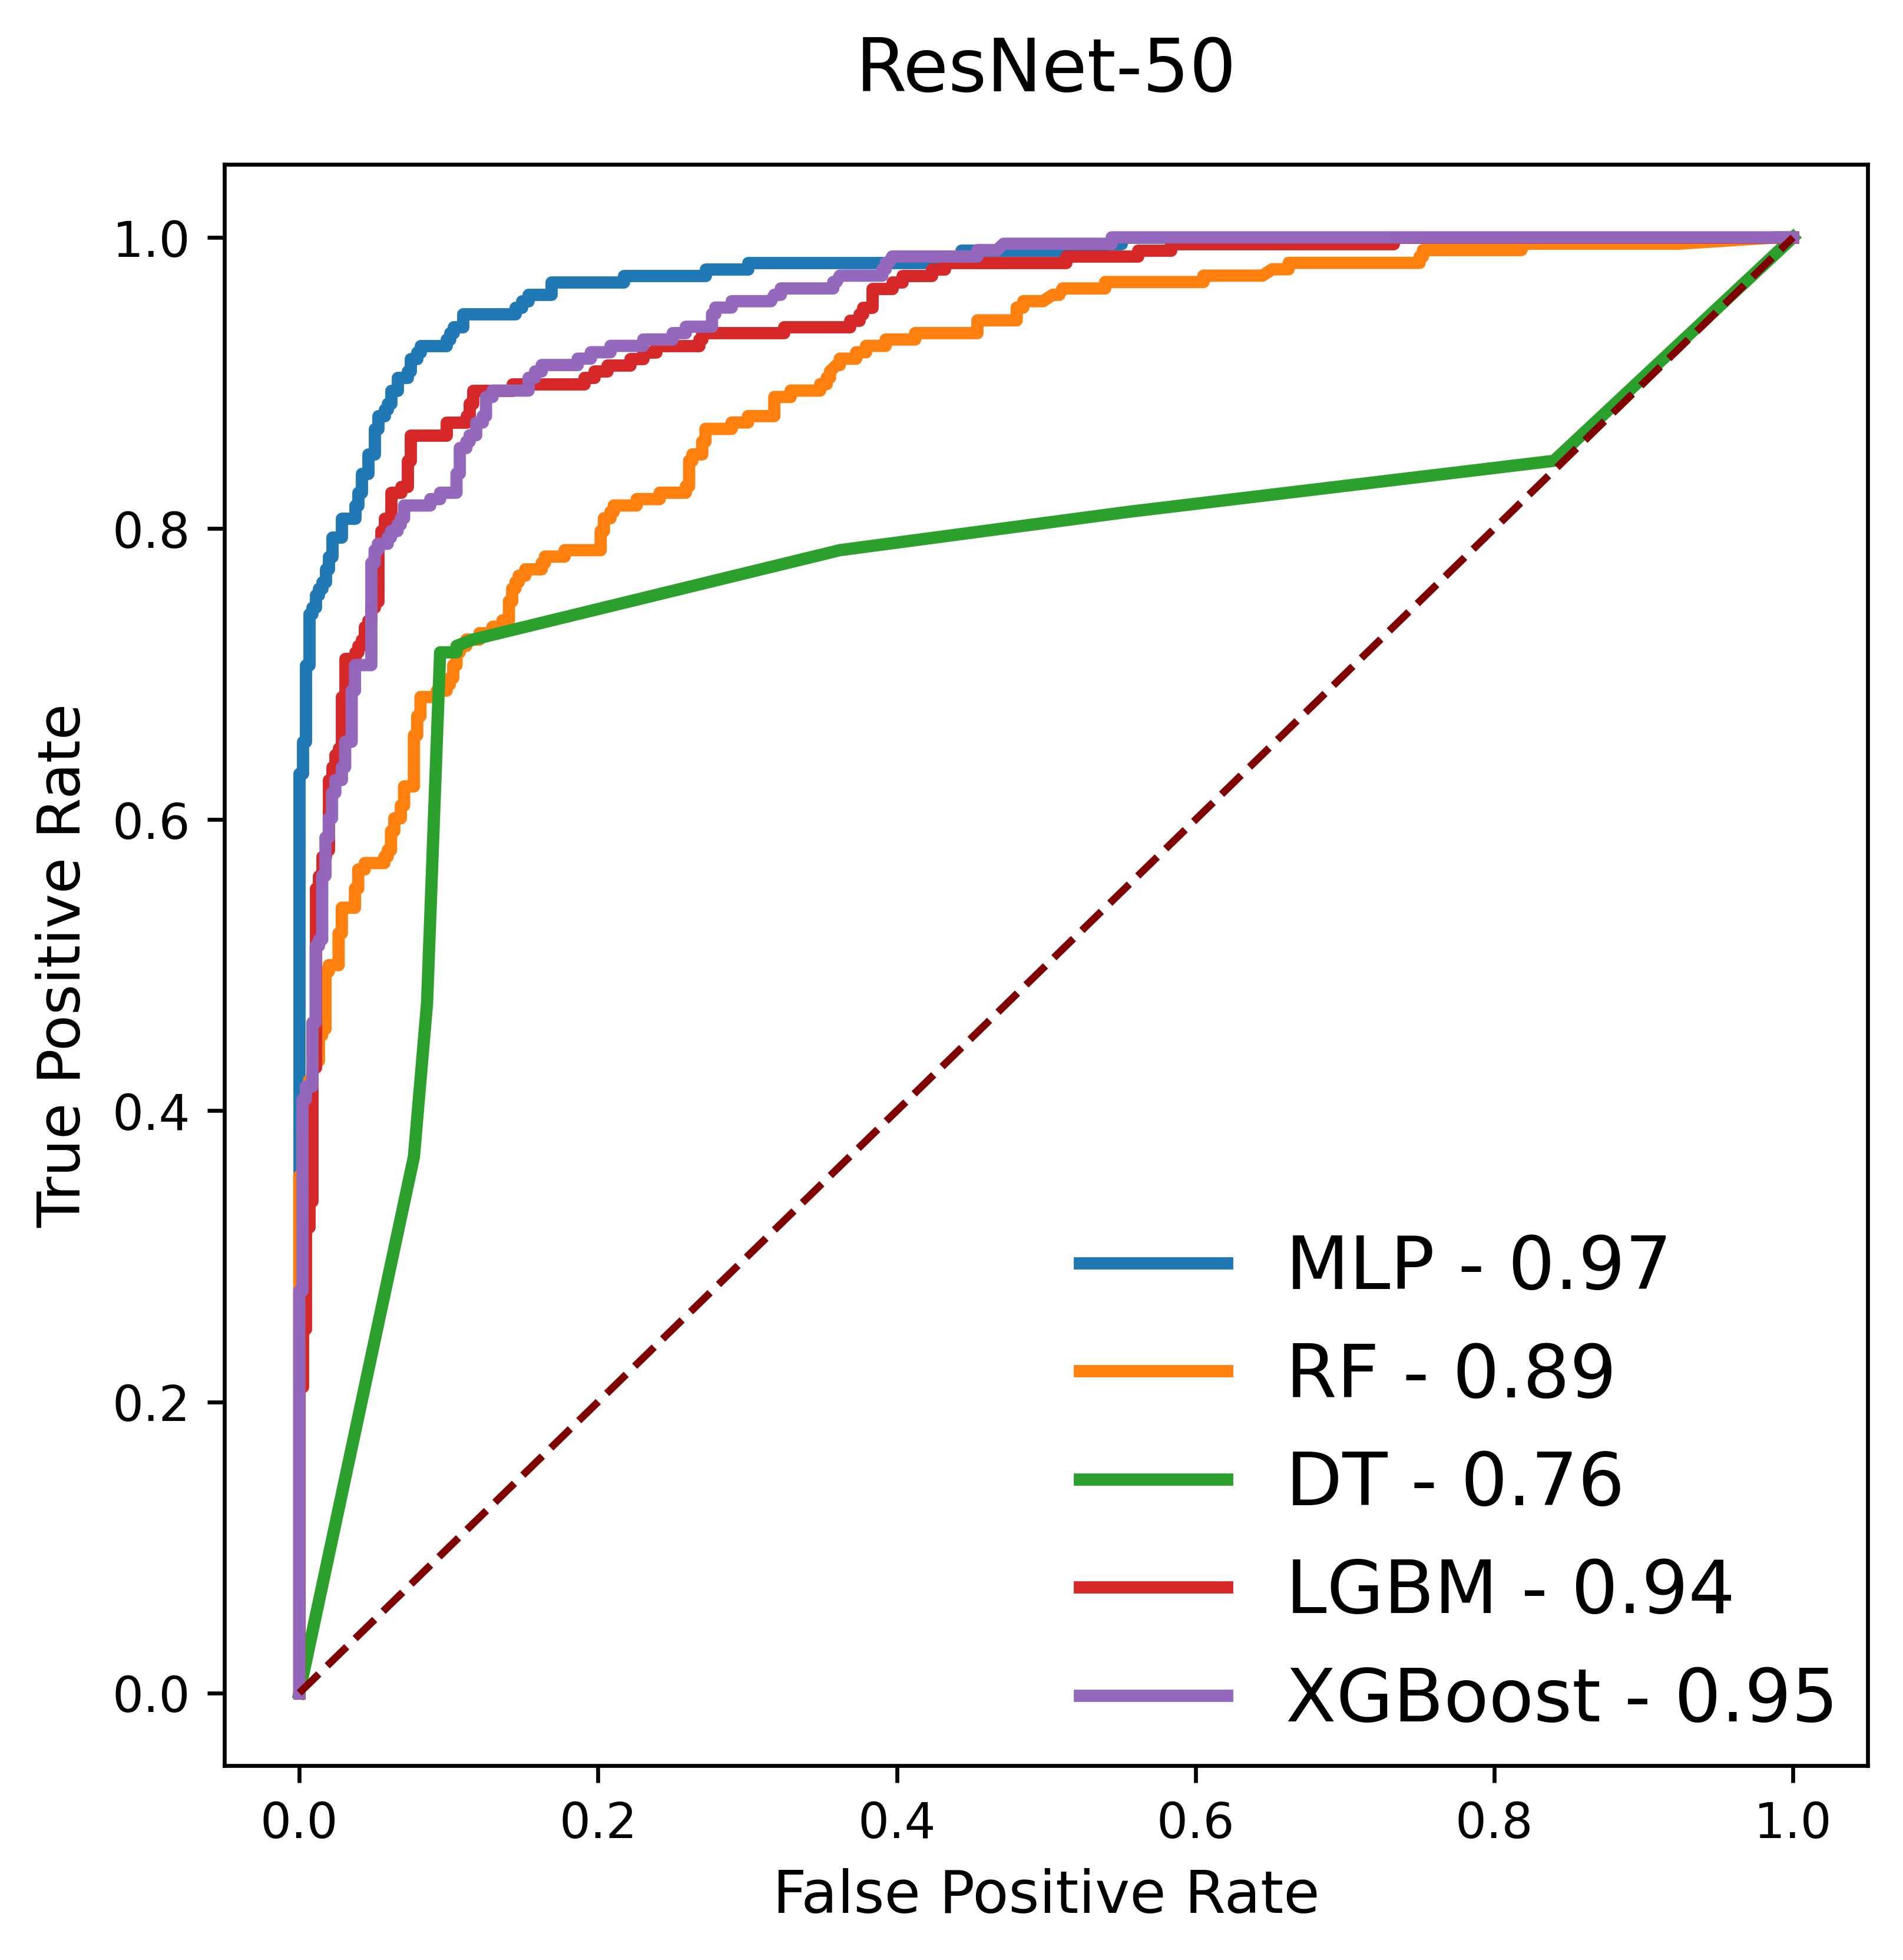

In [ ]:
# Plot all ROC curves
plt_1 = plt.figure(figsize=(6,6))
plt.plot(
    mlp_fpr["micro"],
    mlp_tpr["micro"],
    label="MLP - {0:0.2f}".format(mlp_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)

plt.plot(
    rf_fpr["micro"],
    rf_tpr["micro"],
    label="RF - {0:0.2f}".format(rf_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)

plt.plot(
    dt_fpr["micro"],
    dt_tpr["micro"],
    label="DT - {0:0.2f}".format(dt_roc_auc["micro"]),
    
    alpha = 1,
    linewidth=2.5,
)

plt.plot(
    lgbm_fpr["micro"],
    lgbm_tpr["micro"],
    label="LGBM - {0:0.2f}".format(lgbm_roc_auc["micro"]),
    
    alpha = 2,
    linewidth=2.5,
)
plt.plot(
    xg_fpr['micro'],
    xg_tpr['micro'],
    
    alpha = 2, 
    linewidth=2.5,
    label="XGBoost - %0.2f" % xg_roc_auc['micro'],
)

# change resolution
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

plt.plot([0, 1], [0, 1], "k--", lw=1.5, color='maroon')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.title("ResNet-50", pad= 15, fontsize= 15)
# legend_properties = {'weight':'bold'}
plt.legend(loc="lower right", frameon=False, fontsize=15,borderaxespad=0.)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Osteosercoma/resnet-50.png")
plt.show()

In [ ]:
clf =  MLPClassifier(random_state=1, max_iter=200)
clf.fit(x_train_features, y_train)

# MLP Accuracy 
mlp_predict = clf.predict(x_test_features)

#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(mlp_predict, y_test)
print ("Accuracy = ", round(acc, 3))


# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, mlp_predict)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

Accuracy =  0.886
ROC-AUC score is:  0.98
The Matthews correlation coefficinet (MCC) is:  0.82


# XGBOOST

In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate= 0.006)
model.fit(x_train_features, y_train) #For sklearn no one hot encoding

XGBClassifier(learning_rate=0.006, objective='multi:softprob')

In [ ]:
#Now predict using the trained RF model. 
prediction = model.predict(x_test_features)

In [ ]:
prediction

array([0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 1, 2, 2, 1])

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, prediction)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.842


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.755


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

clf = xgb.XGBClassifier().fit(x_train_features, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.974


**Confusion Matrix**

In [ ]:
# Function to plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize= False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
        title = "Normalized Confusion Matrix"
    else:
        # print('Confusion matrix, without normalization')
        title = "Confusion Matrix"

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

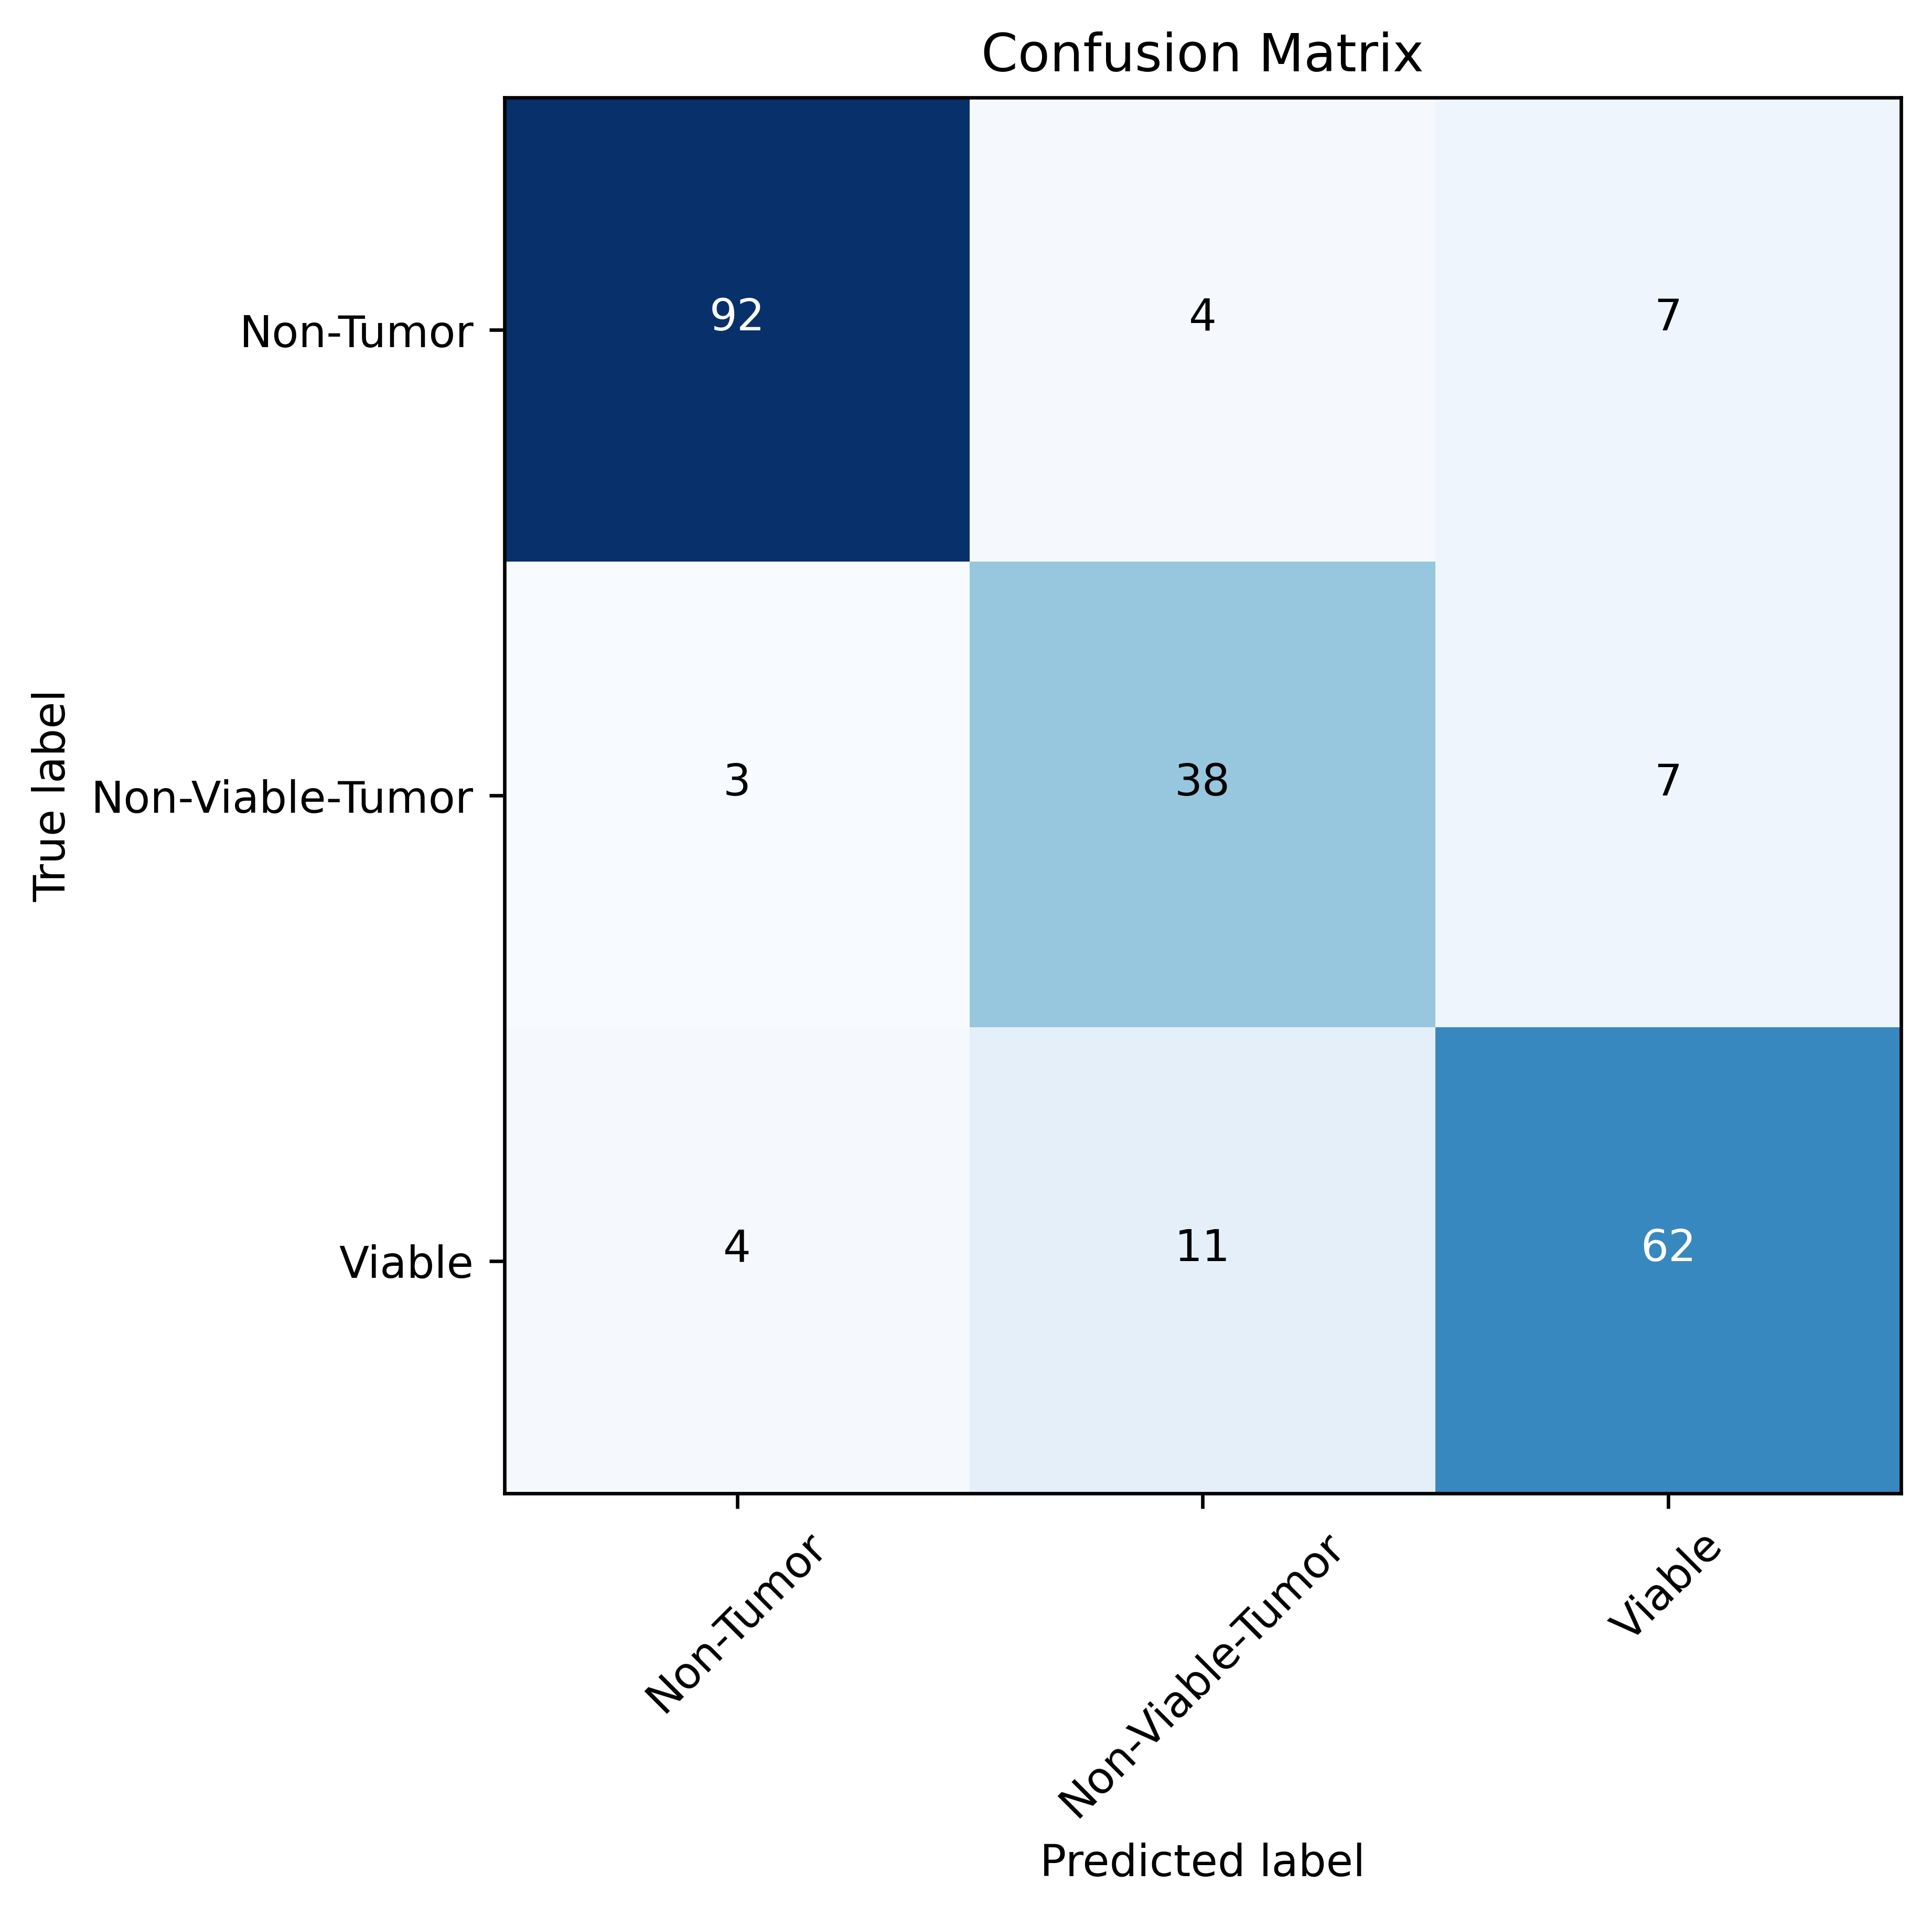

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

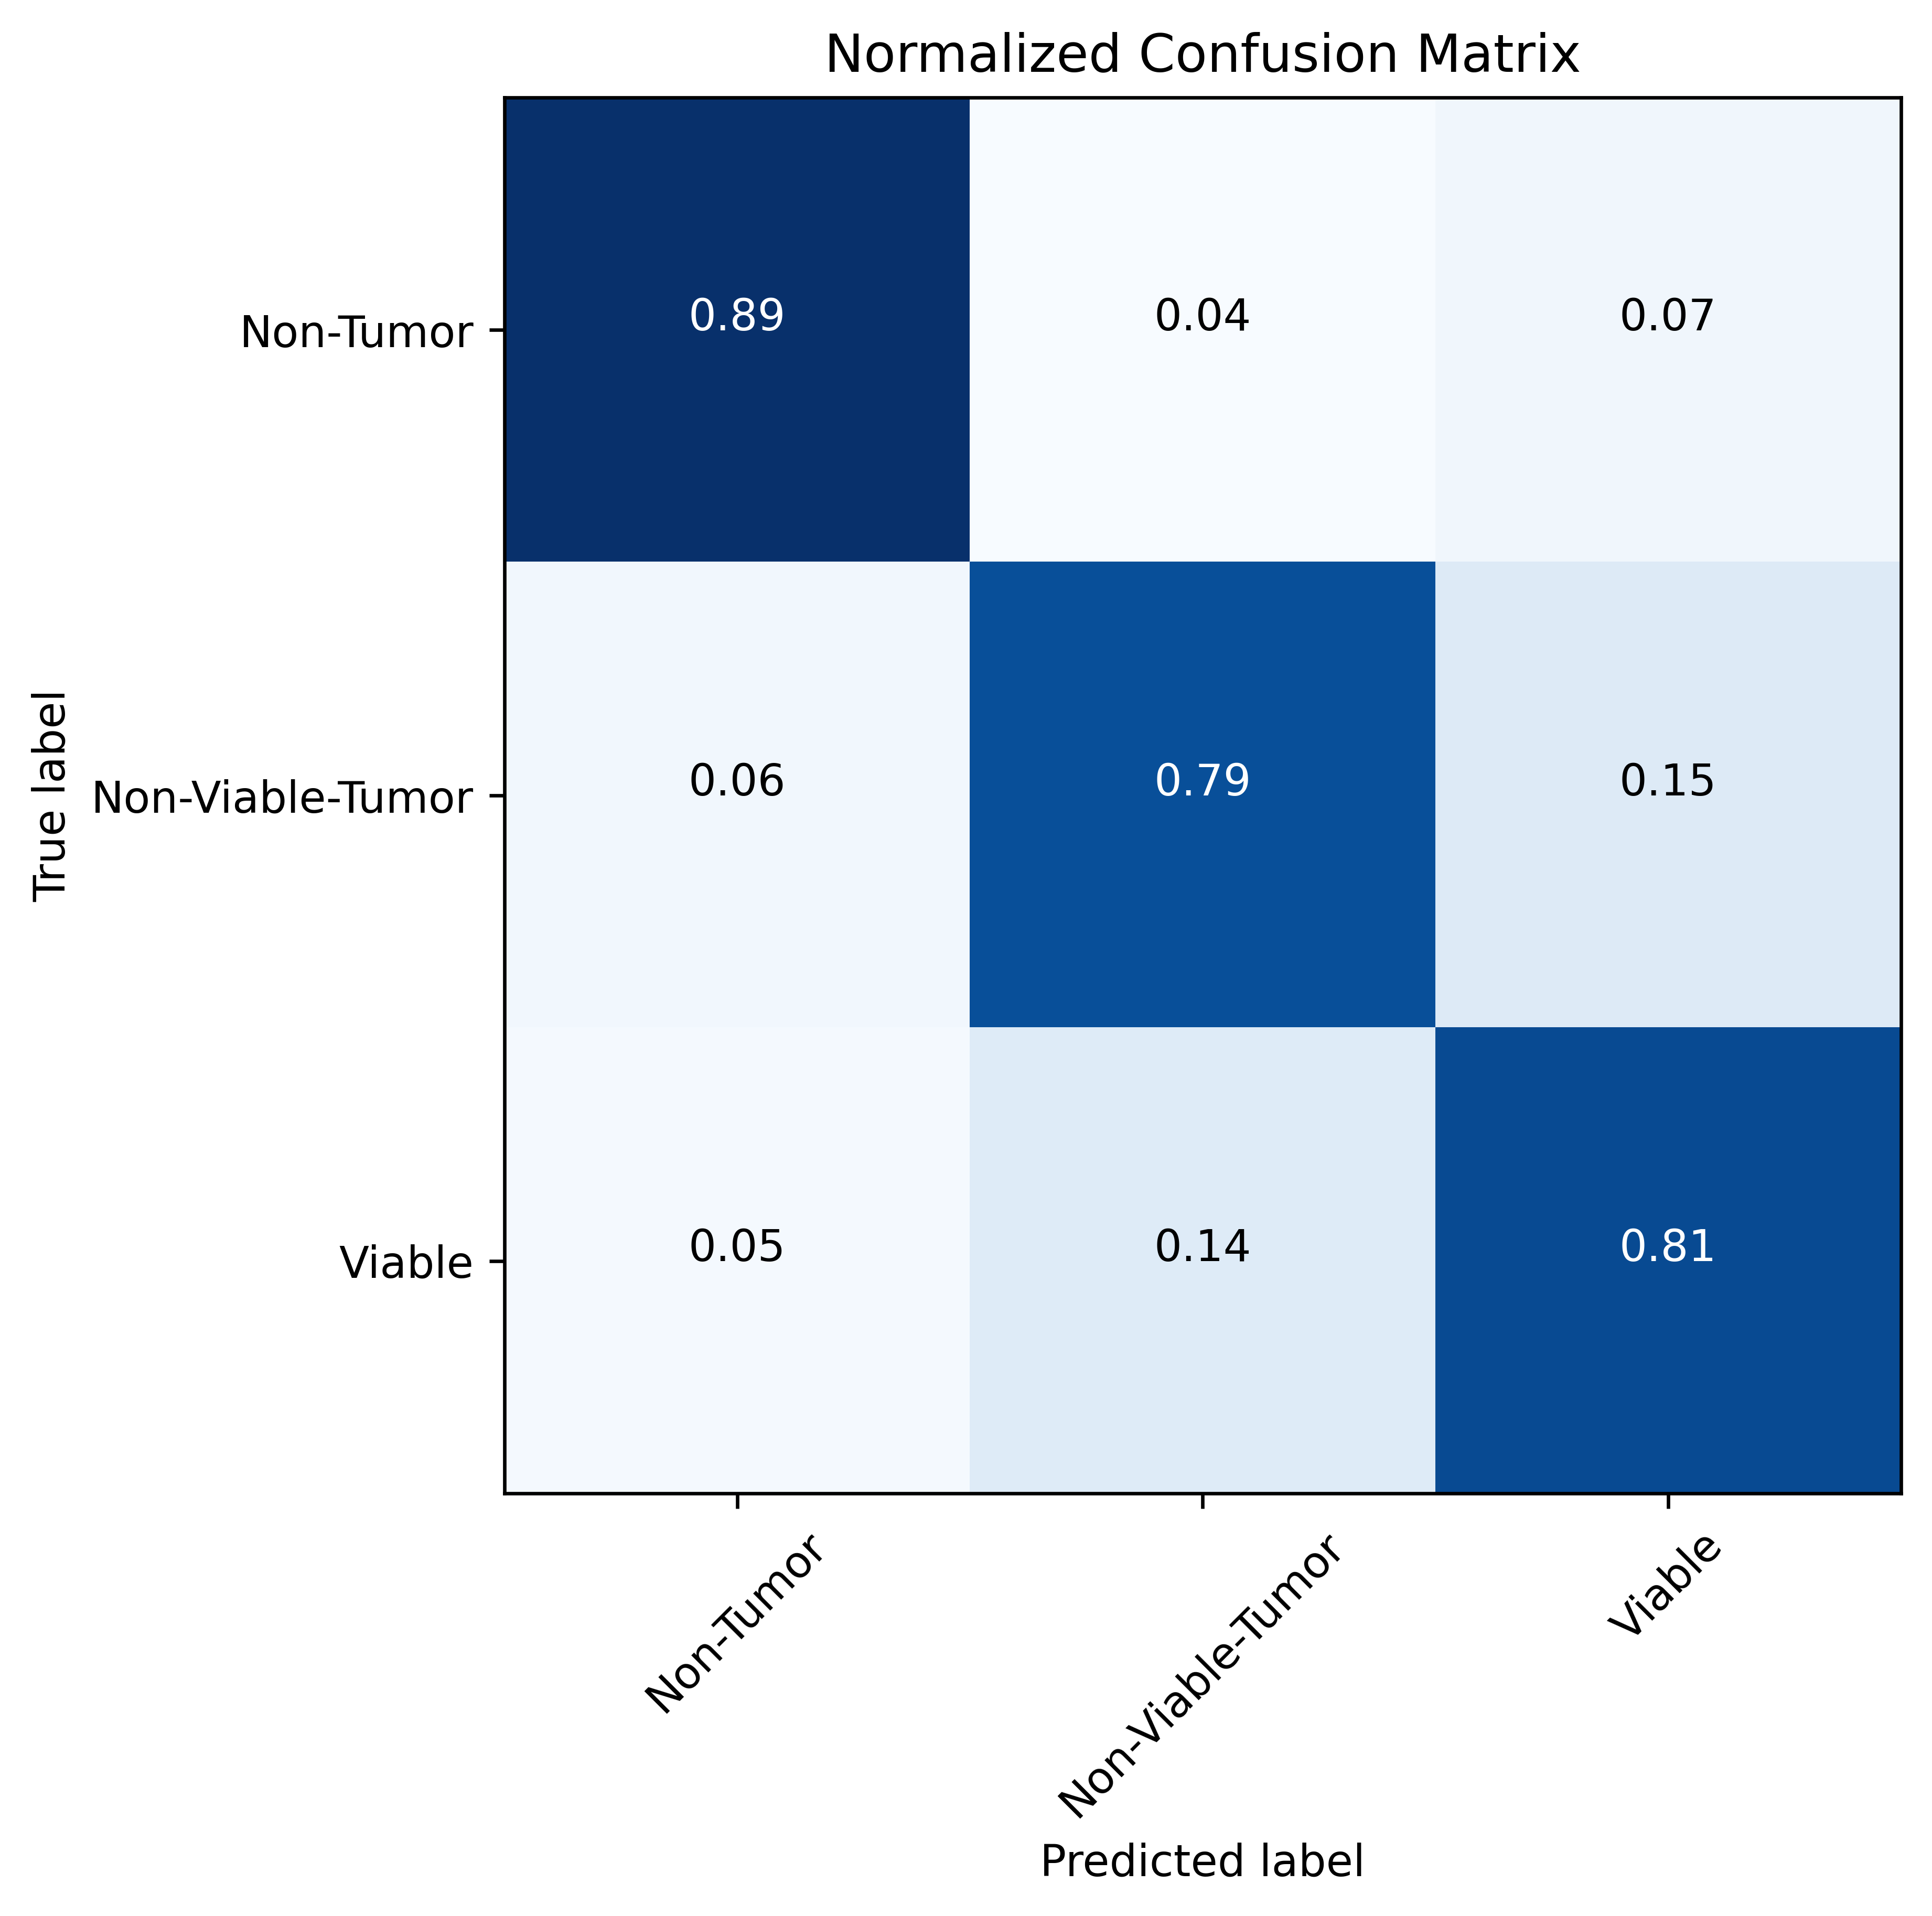

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

In [ ]:
# function to measure TP, FP, TN, FN

def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

class_id = set(y_test).union(set(prediction))
print(class_id)
c, tp, fp, tn, fn = perf_measure(y_test, prediction)
print("TP: ", tp)
print("FP: ", fp)
print("TN: ", tn)
print("FN: ", fn)

{0, 1, 2}
TP:  [92, 38, 62]
FP:  [7, 15, 14]
TN:  [100, 154, 130]
FN:  [29, 21, 22]


**Classification Report**

In [ ]:
# classification report using scikit learn 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       103
           1       0.72      0.79      0.75        48
           2       0.82      0.81      0.81        77

    accuracy                           0.84       228
   macro avg       0.82      0.83      0.82       228
weighted avg       0.85      0.84      0.84       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, prediction)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.929     	       0.76      	   0.935   
  1   Non-Viable-Tumor     0.717     	      0.644      	   0.911   
  2        Viable          0.816      	      0.738      	   0.903   


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# defining decision tree classifier 
# d_tree_clf = DecisionTreeClassifier(random_state=0)
d_tree_clf = DecisionTreeClassifier(max_depth =7, random_state = 42)
d_tree_clf.fit(x_train_features, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
# predict through test data
d_tree_pred = d_tree_clf.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, d_tree_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.776


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, d_tree_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.648


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, d_tree_clf.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.798


**confusion matrix**

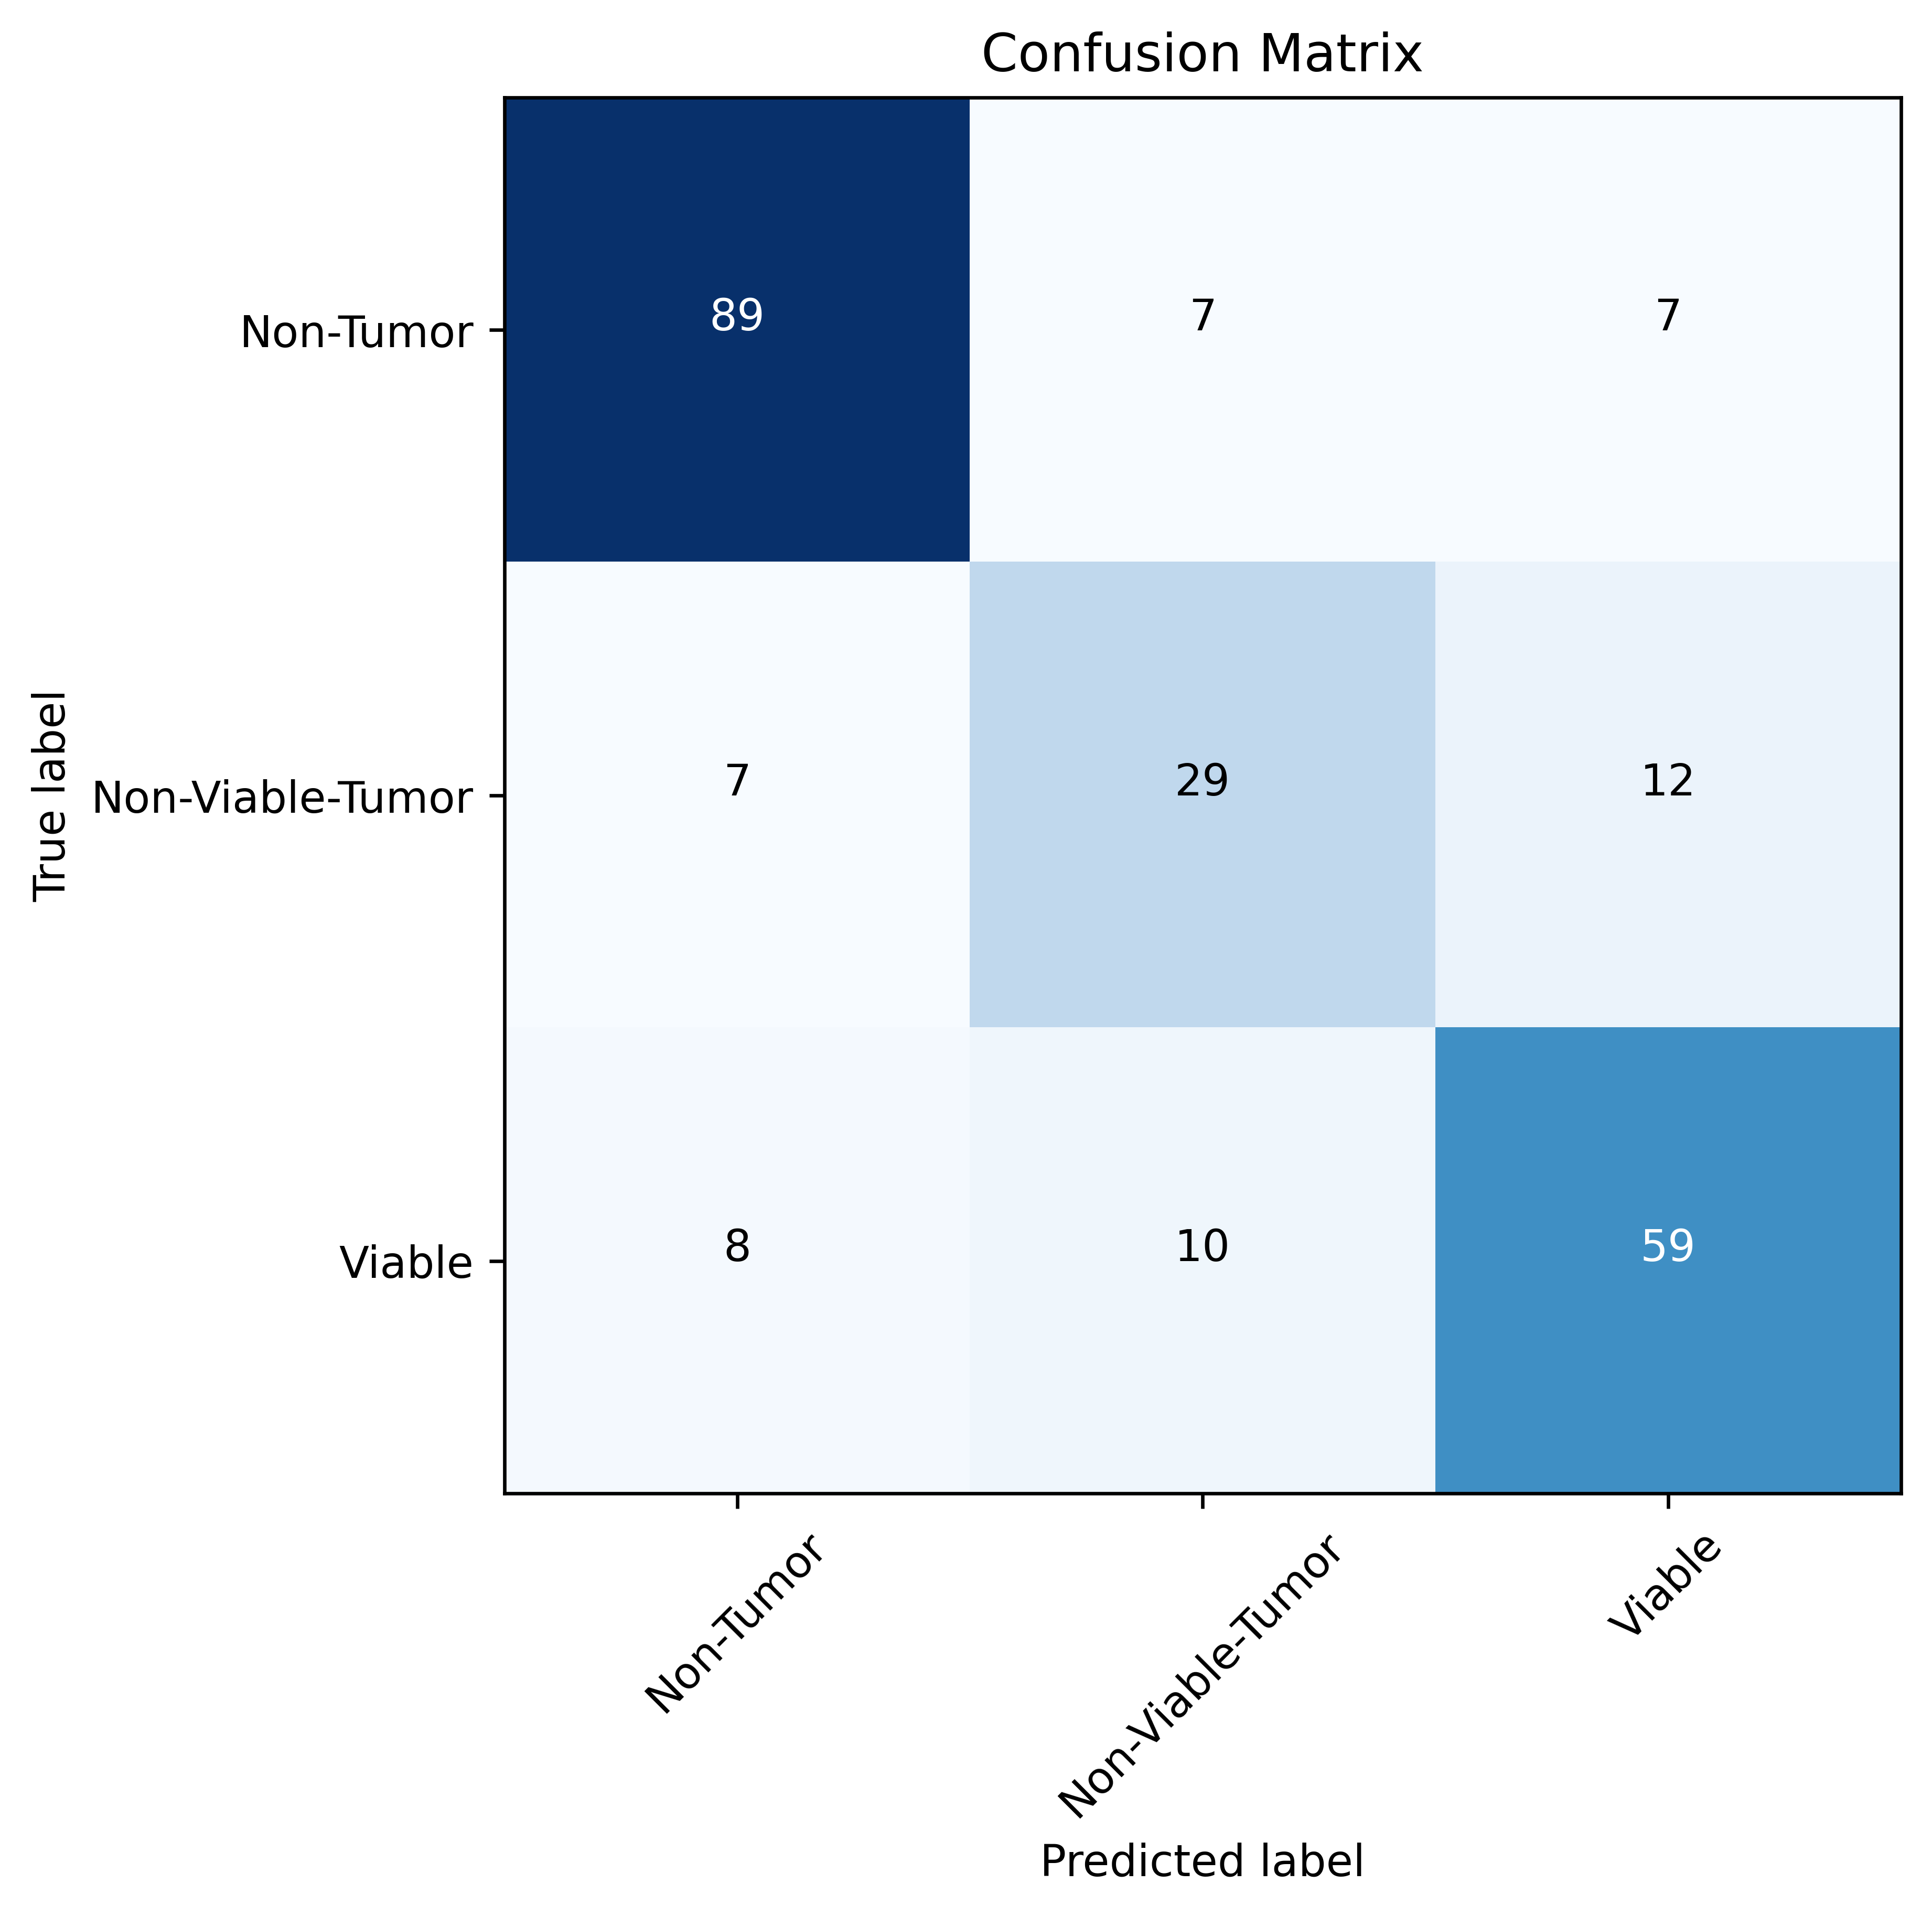

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, d_tree_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

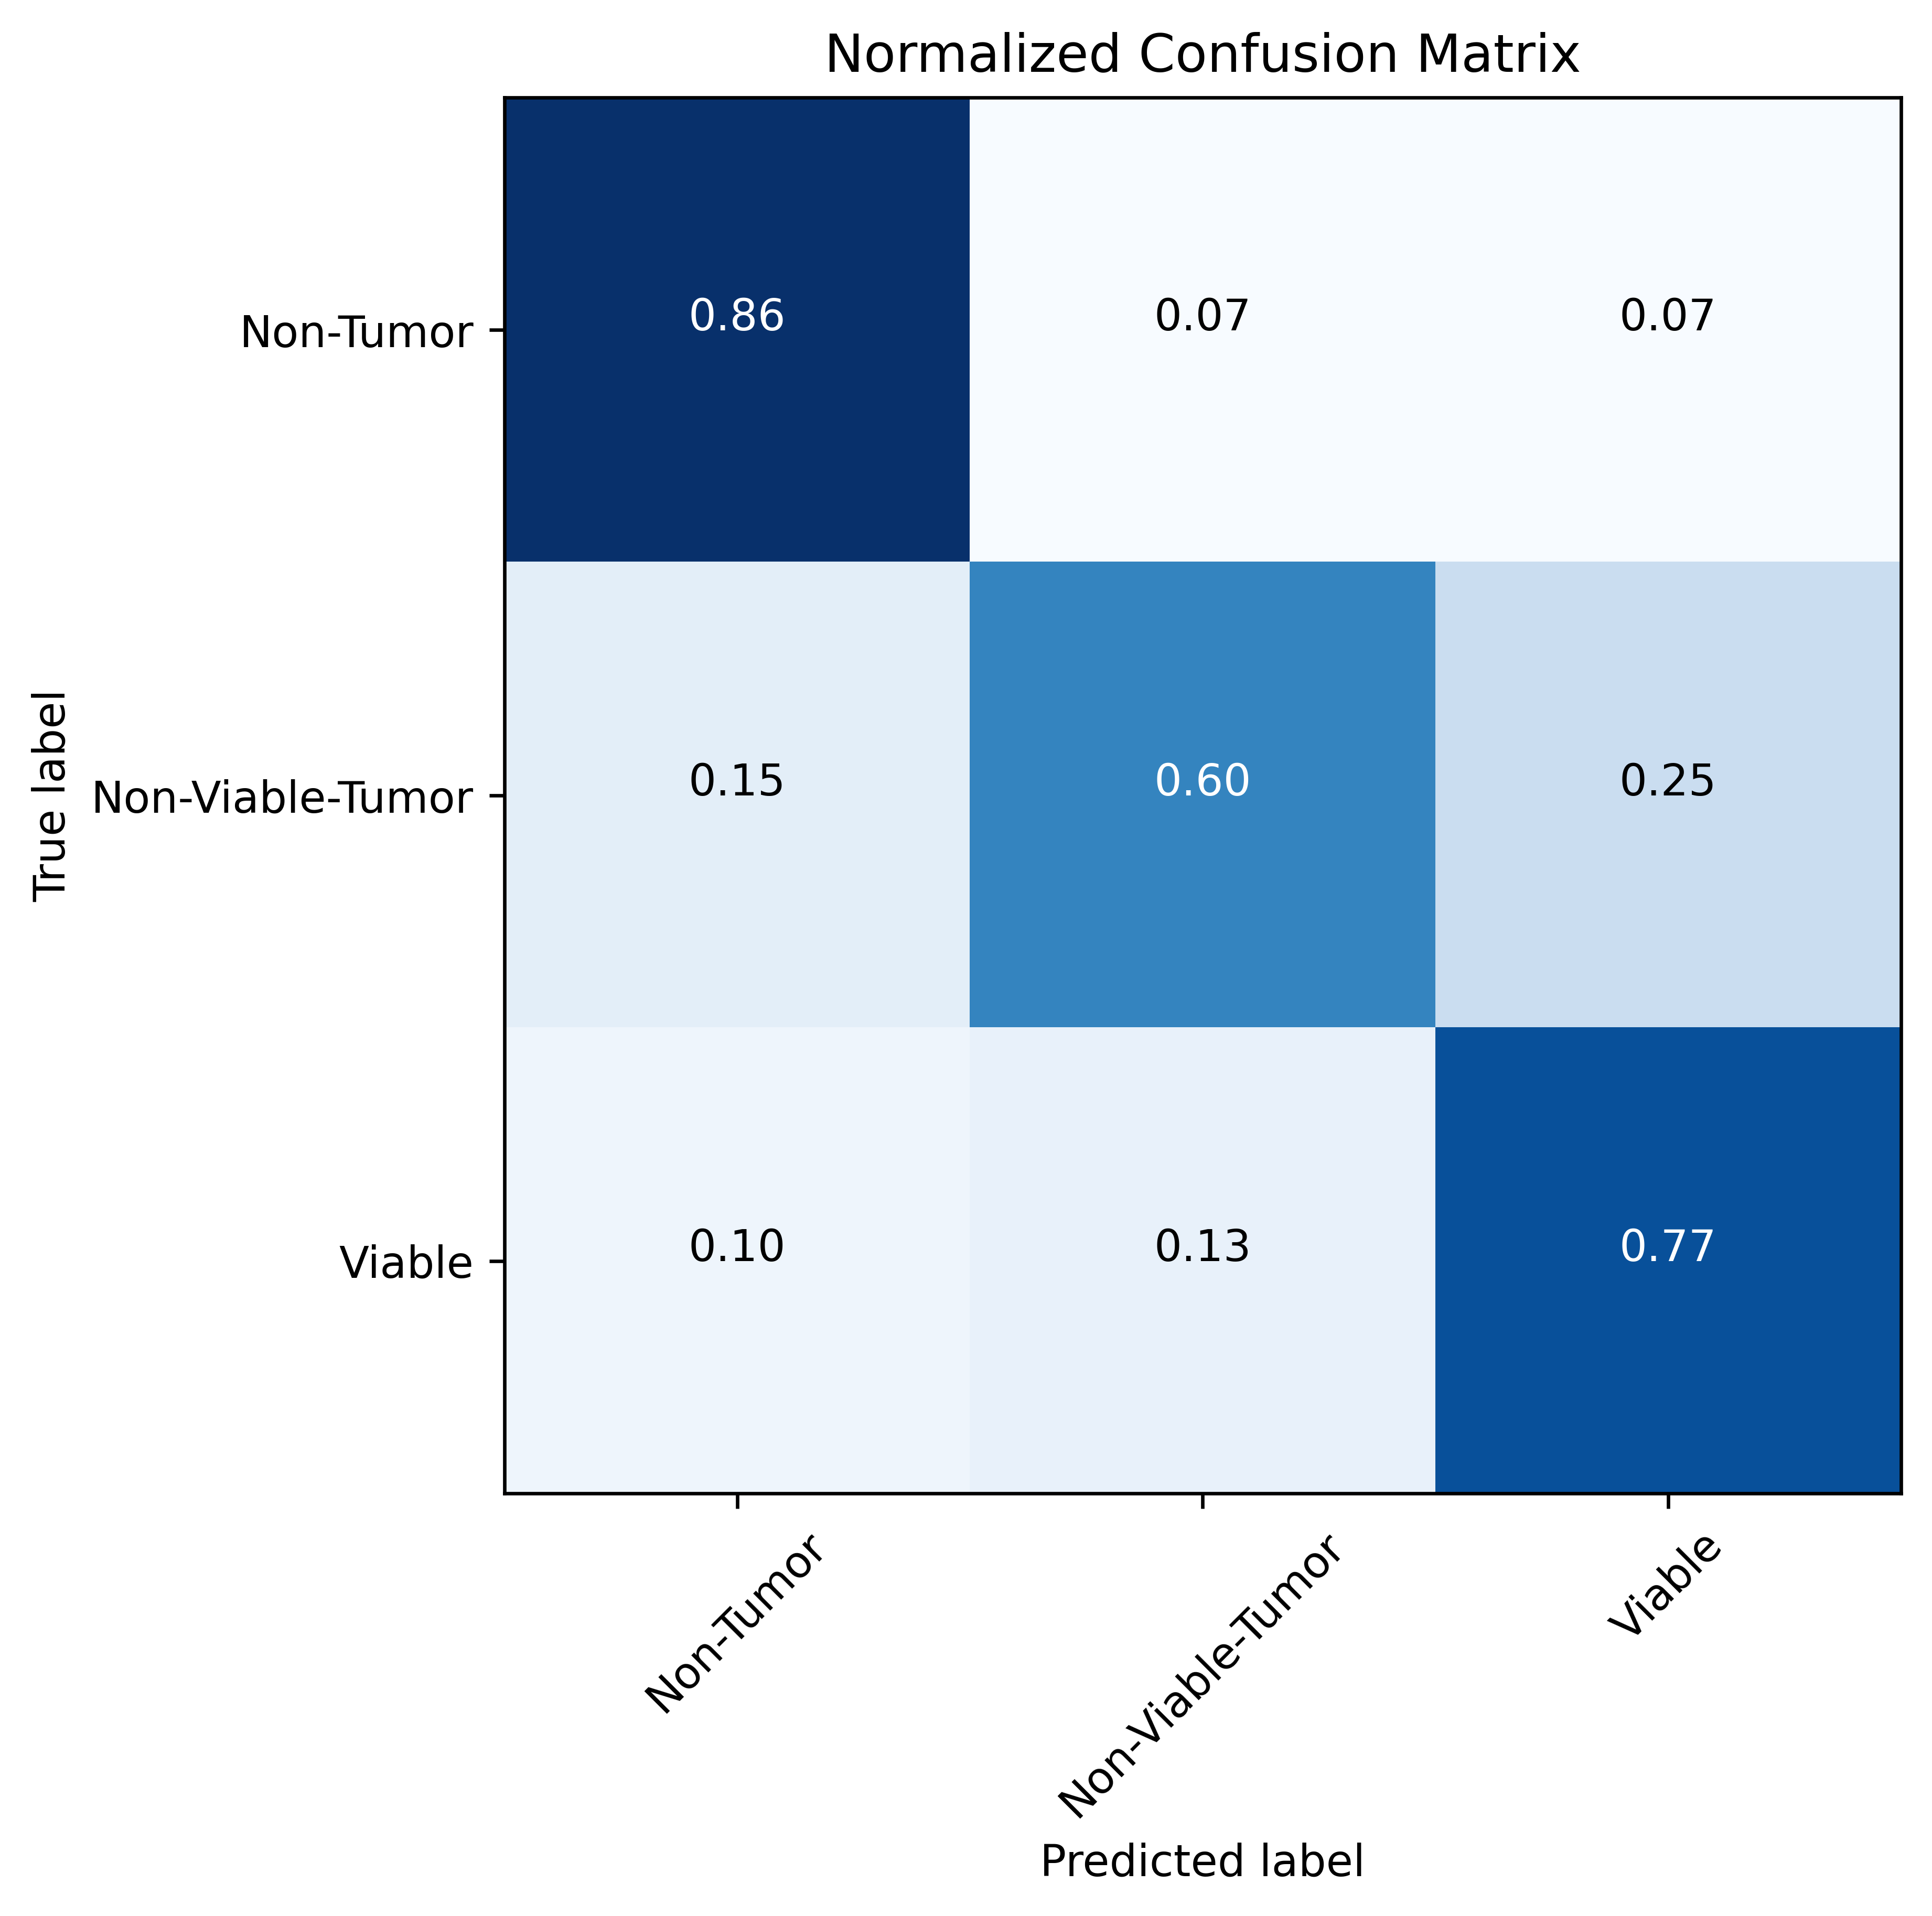

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classification report**

In [ ]:
# getting classification record
from sklearn.metrics import classification_report
print(classification_report(y_test, d_tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.63      0.60      0.62        48
           2       0.76      0.77      0.76        77

    accuracy                           0.78       228
   macro avg       0.75      0.74      0.75       228
weighted avg       0.77      0.78      0.78       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, d_tree_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.856     	      0.712      	   0.854   
  1   Non-Viable-Tumor      0.63     	       0.46      	   0.897   
  2        Viable          0.756      	      0.648      	   0.861   


# Random Forest

In [ ]:
# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
rf_classifier = RandomForestClassifier(n_estimators = 16, criterion = 'gini',ccp_alpha=0.05, random_state = 42)
rf_classifier.fit(x_train_features, y_train)

RandomForestClassifier(ccp_alpha=0.05, n_estimators=16, random_state=42)

In [ ]:
# prediciting on test data
rf_pred = rf_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, rf_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.715


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, rf_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.553


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.909


**confusion matrix**

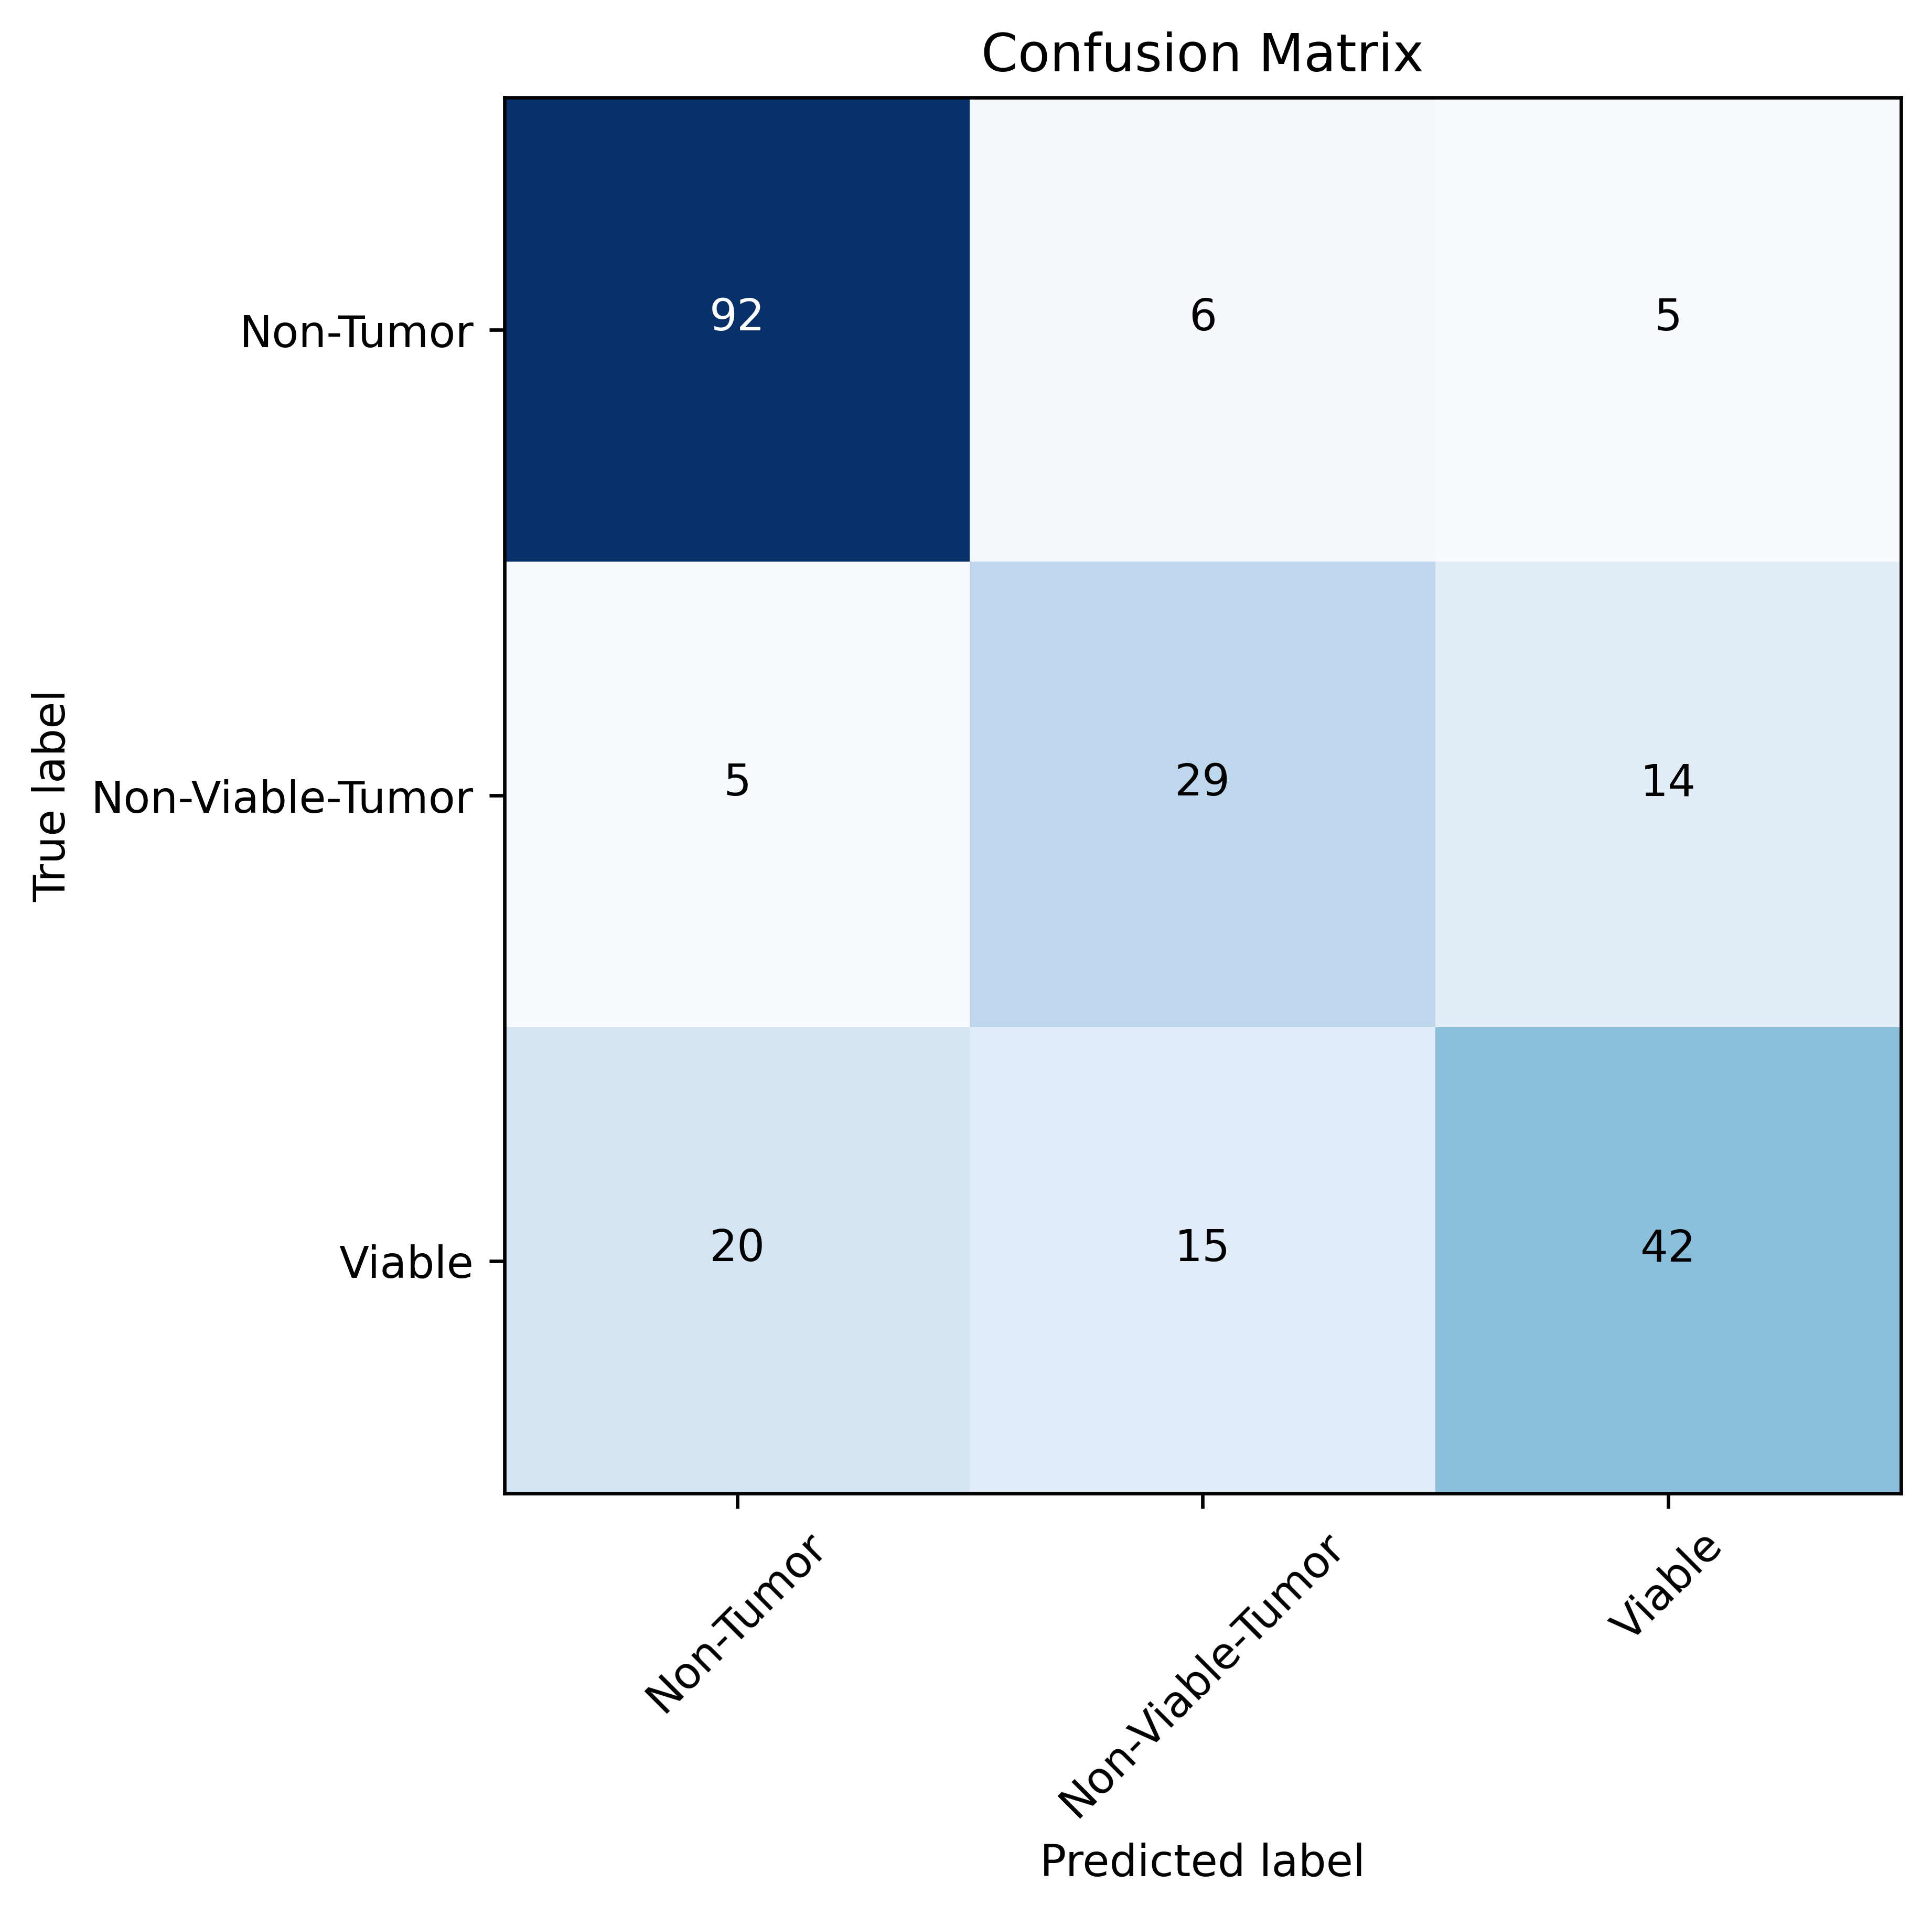

In [ ]:
# getting confusion matrix 
conf_matrix = confusion_matrix(y_test, rf_pred)

# plotting confusion matrix without normalization
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

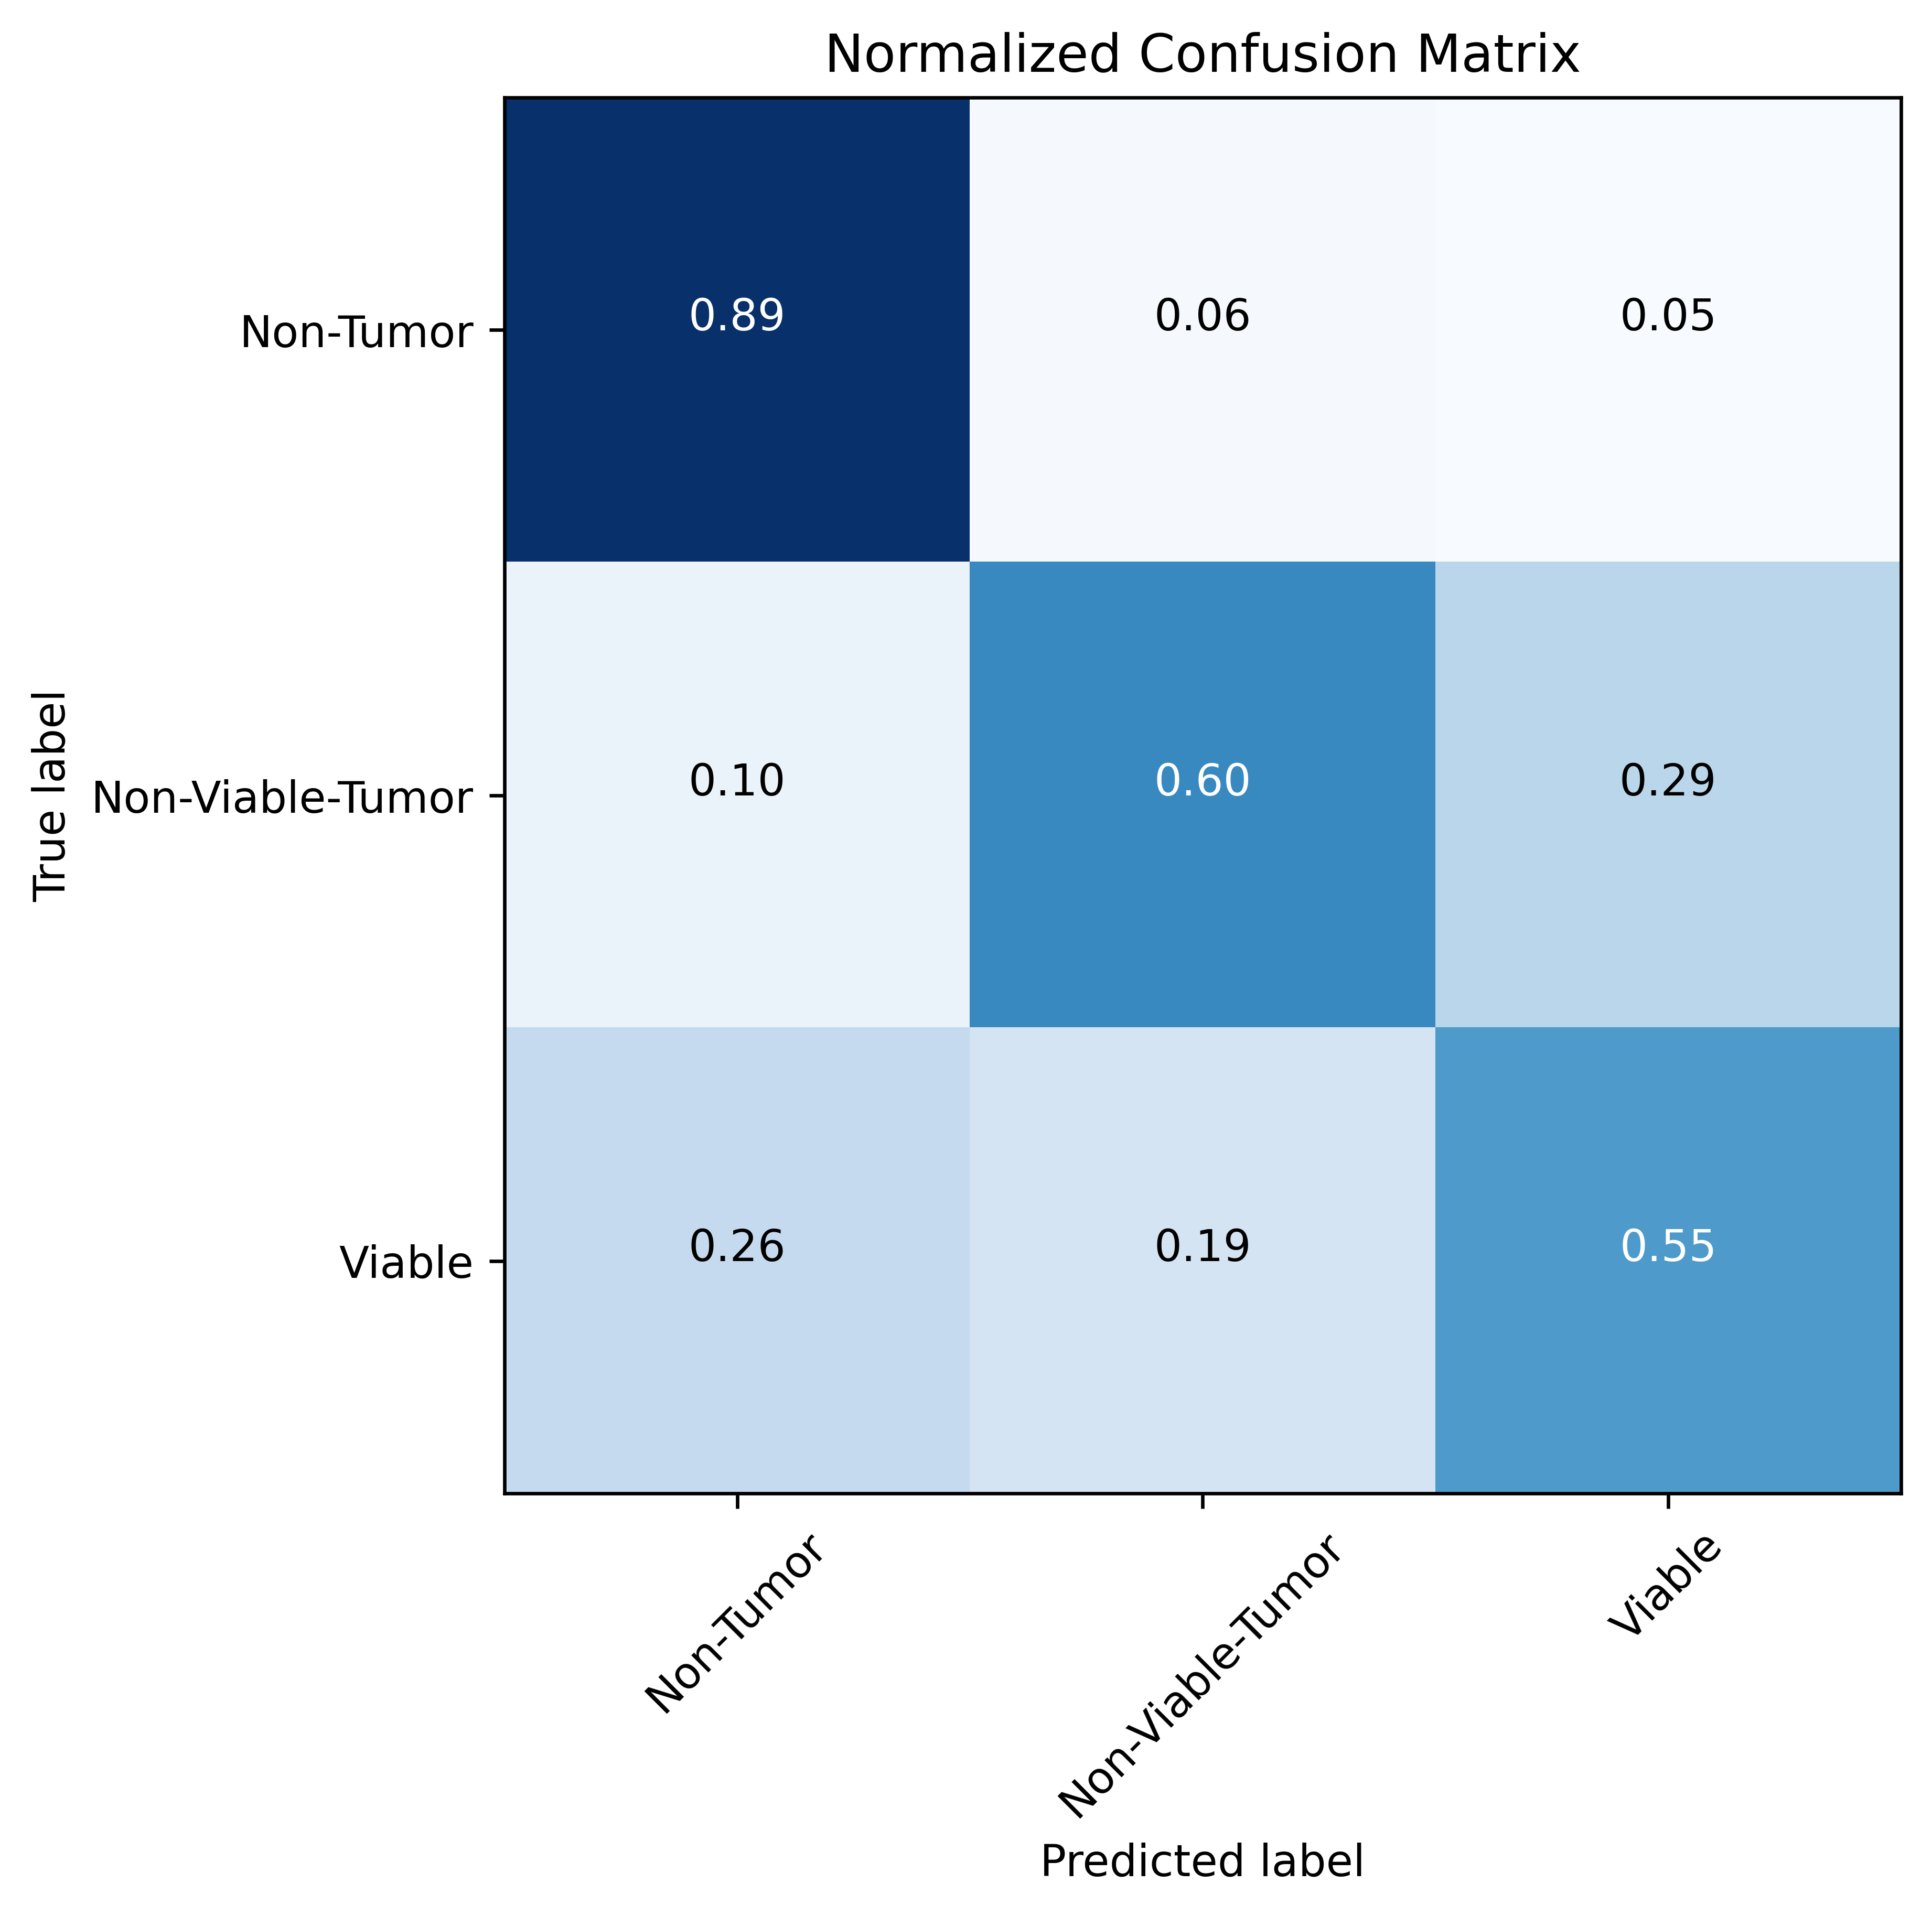

In [ ]:
# plotting confusion matrix with normalization
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classification report**

In [ ]:
# getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       103
           1       0.58      0.60      0.59        48
           2       0.69      0.55      0.61        77

    accuracy                           0.71       228
   macro avg       0.68      0.68      0.68       228
weighted avg       0.71      0.71      0.71       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, rf_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.786     	      0.697      	    0.74   
  1   Non-Viable-Tumor      0.58     	      0.397      	   0.865   
  2        Viable          0.689      	      0.477      	   0.864   


# Light Gradient Boosting (LGBM)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# fit the model on the whole dataset
lgbm_model = LGBMClassifier(learning_rate= 0.005)

# fit our training data into lgbm classifier
lgbm_model.fit(x_train_features, y_train)

LGBMClassifier(learning_rate=0.005)

In [ ]:
# predicting test features using LGBM classifier
lgbm_pred = lgbm_model.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, lgbm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.803


**ROC-AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, lgbm_model.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

ROC-AUC score is:  0.961


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, lgbm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.699


**confusion matrix**

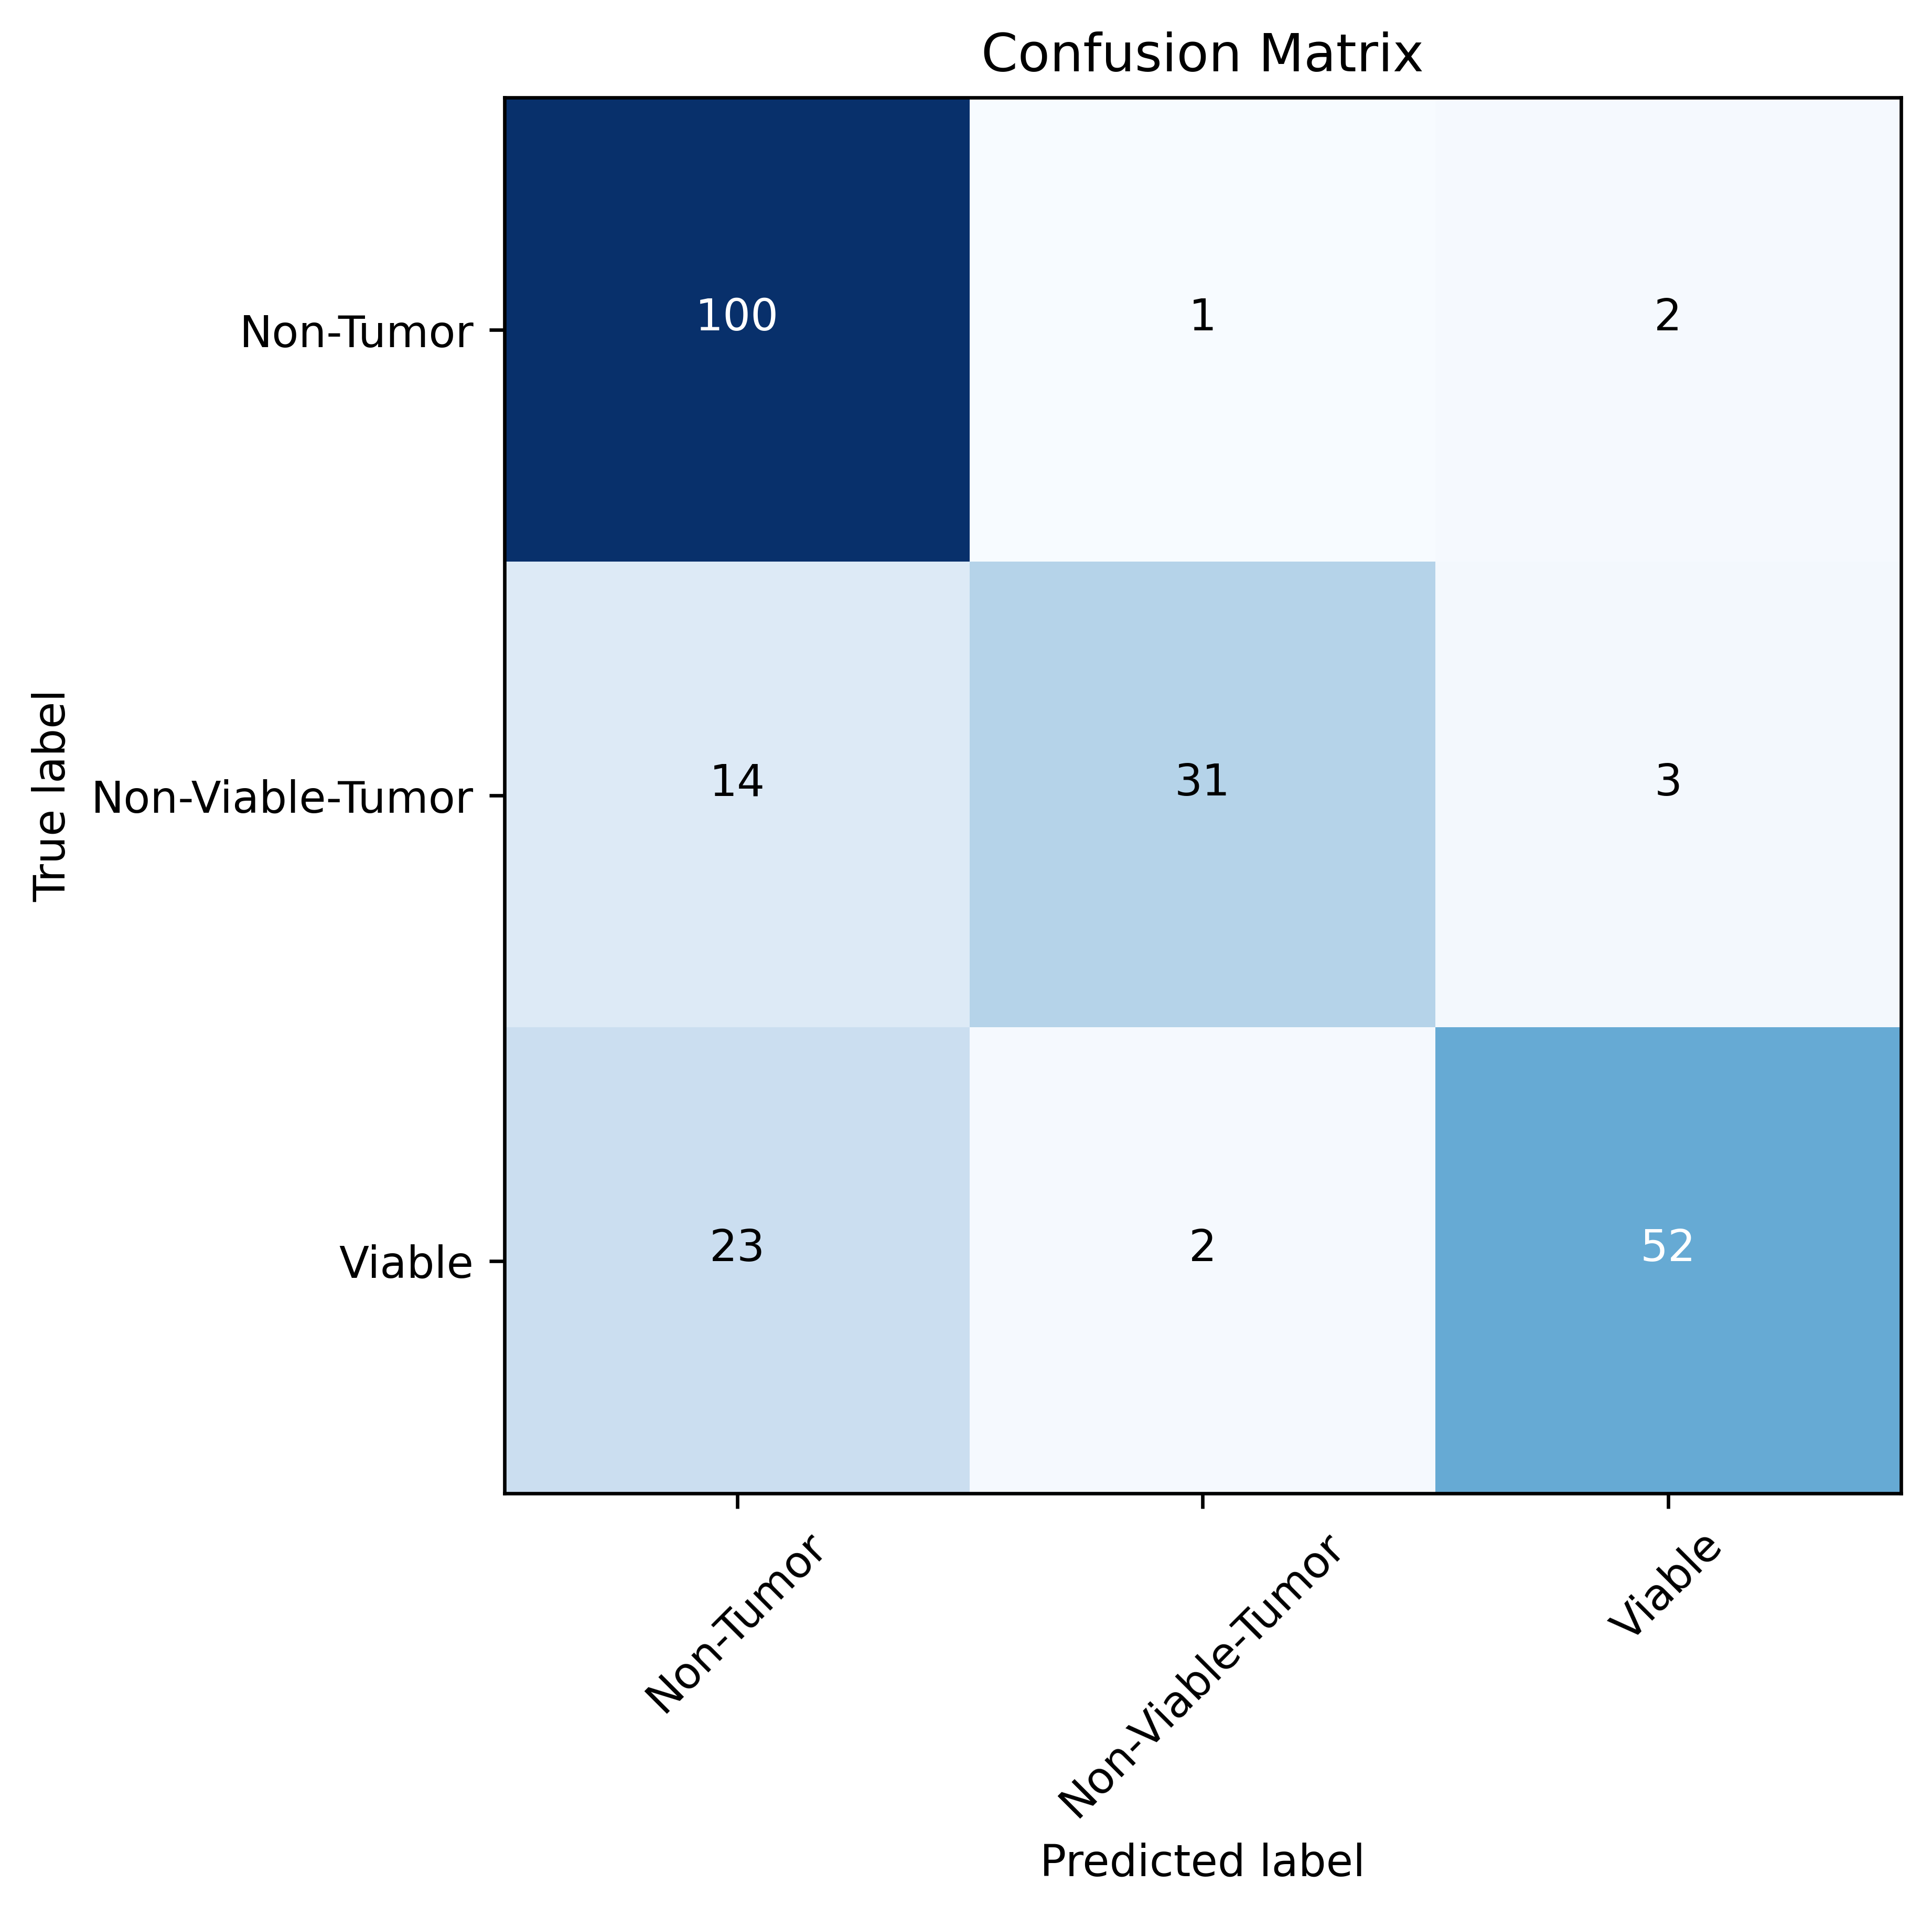

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

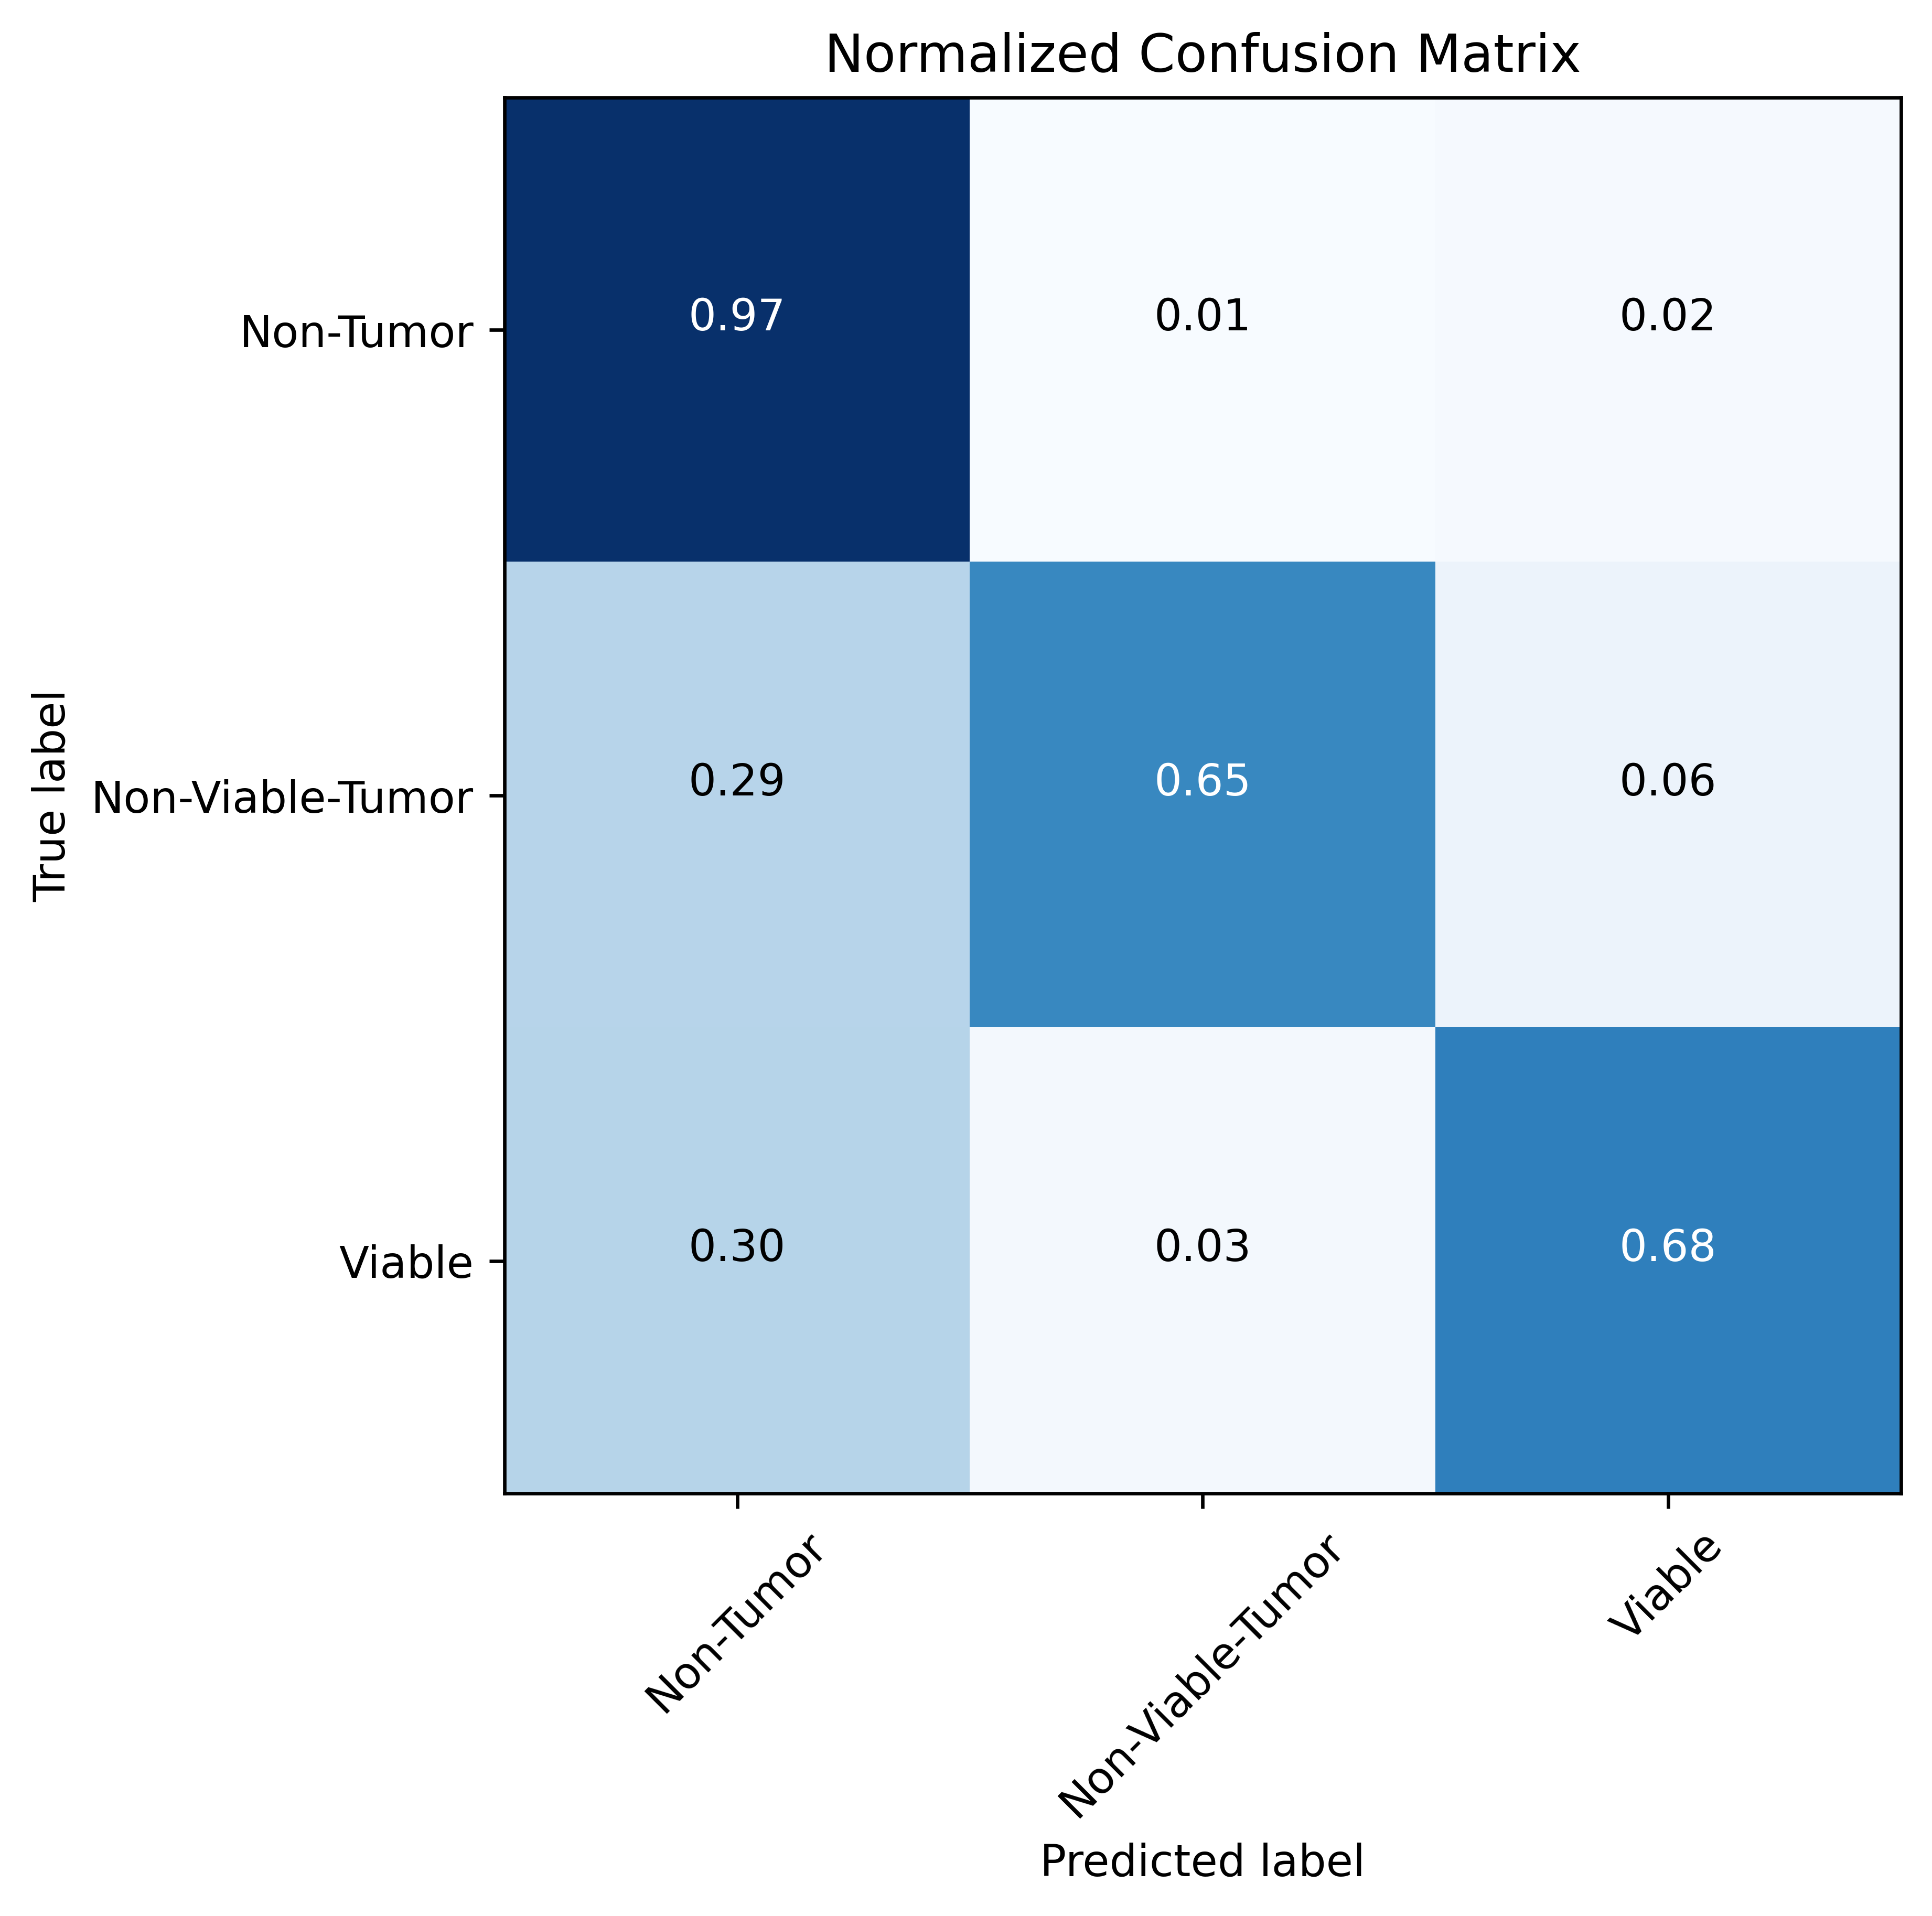

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**classsification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       103
           1       0.91      0.65      0.76        48
           2       0.91      0.68      0.78        77

    accuracy                           0.80       228
   macro avg       0.85      0.76      0.79       228
weighted avg       0.83      0.80      0.80       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, lgbm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor         0.73     	      0.926      	   0.692   
  1   Non-Viable-Tumor     0.912     	      0.425      	   0.981   
  2        Viable          0.912      	      0.565      	   0.963   


# MLP

In [ ]:
# importing SVM module
from sklearn.svm import SVC

In [ ]:
# kernel to be set radial bf 
# svm_classifier = SVC(kernel='linear')
svm_classifier = MLPClassifier(random_state=1, max_iter=200)
# fit our training data into svm classifier
svm_classifier.fit(x_train_features, y_train)

MLPClassifier(random_state=1)

In [ ]:
# predicting test data 
svm_pred = svm_classifier.predict(x_test_features)

**Accuracy**

In [ ]:
#Print overall accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test, svm_pred)
print ("Accuracy = ", round(acc, 3))

Accuracy =  0.877


**Matthews Correlation Coefficient (MCC)**

In [ ]:
# Compute the Matthews correlation coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, svm_pred)
print("The Matthews correlation coefficinet (MCC) is: ", round(mcc, 3))

The Matthews correlation coefficinet (MCC) is:  0.812


**ROC AUC**

In [ ]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
from sklearn.metrics import roc_auc_score

svm_c = SVC(kernel='linear', probability= True).fit(x_train_features, y_train)

roc_auc = roc_auc_score(y_test, svm_c.predict_proba(x_test_features), multi_class='ovr')
print("ROC-AUC score is: ", round(roc_auc, 3))

NameError: ignored

**Confusion Matrix**

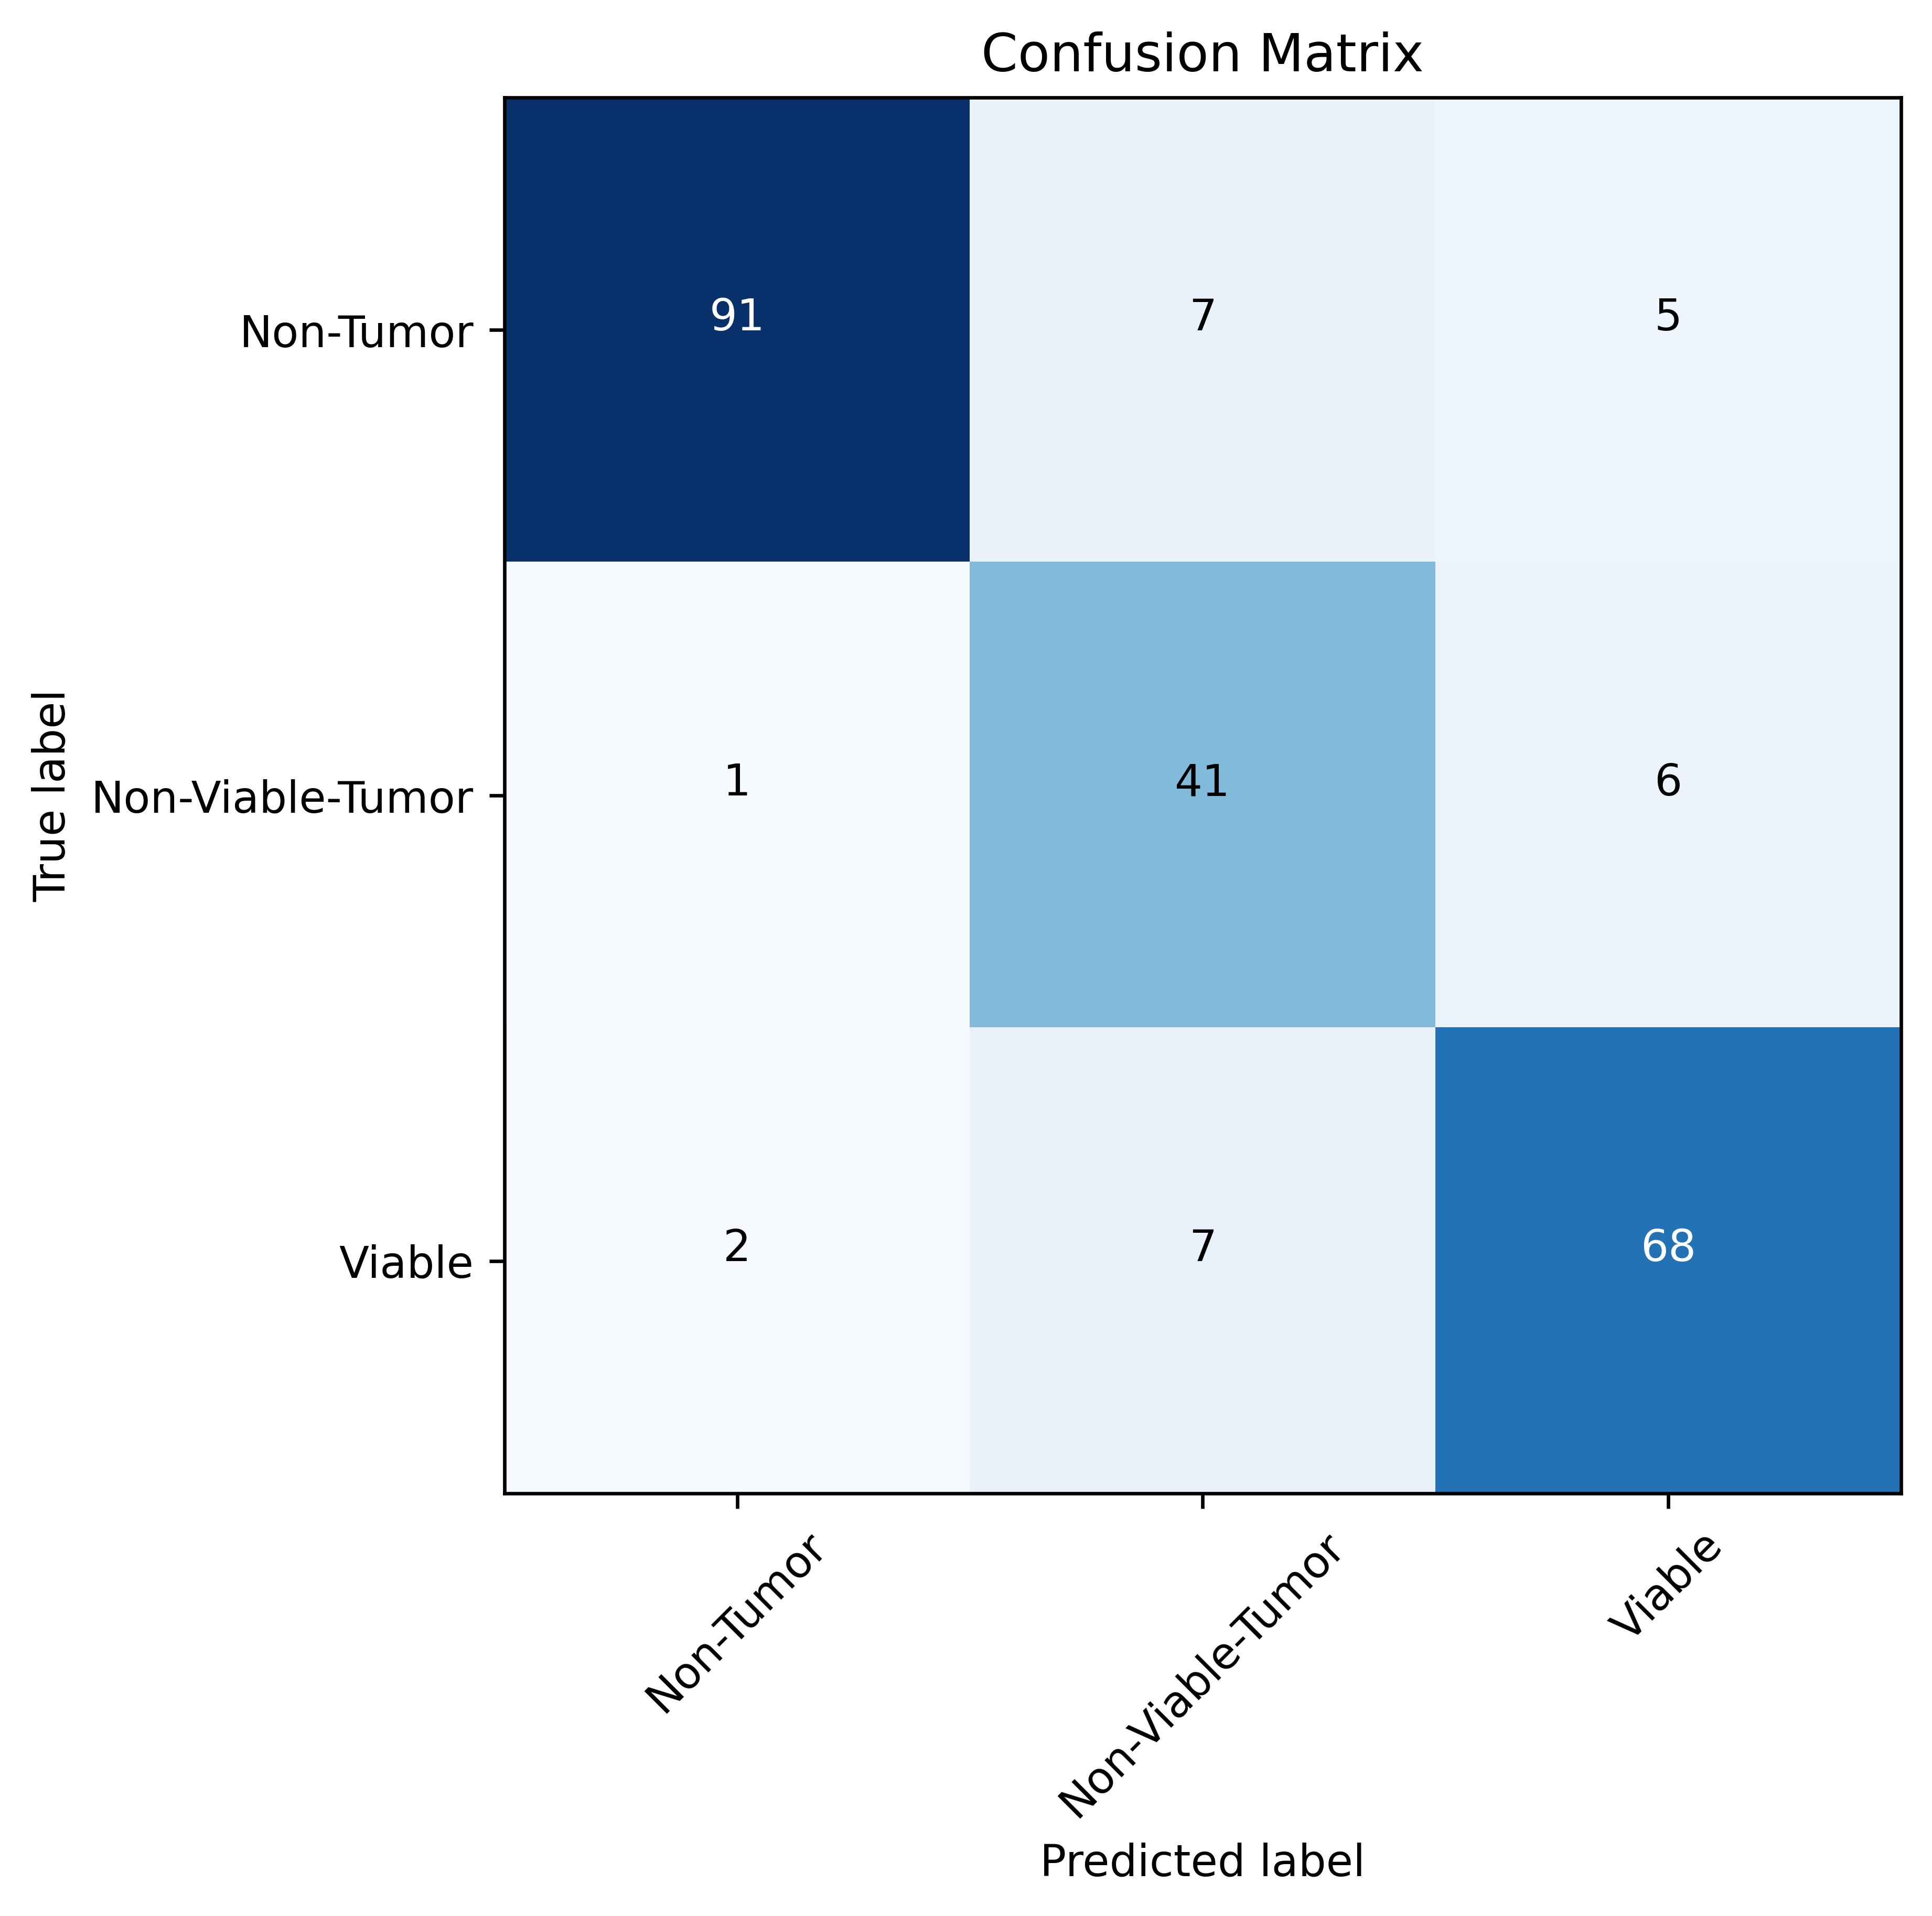

In [ ]:
# getting confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# plotting confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= False)
plt.show()

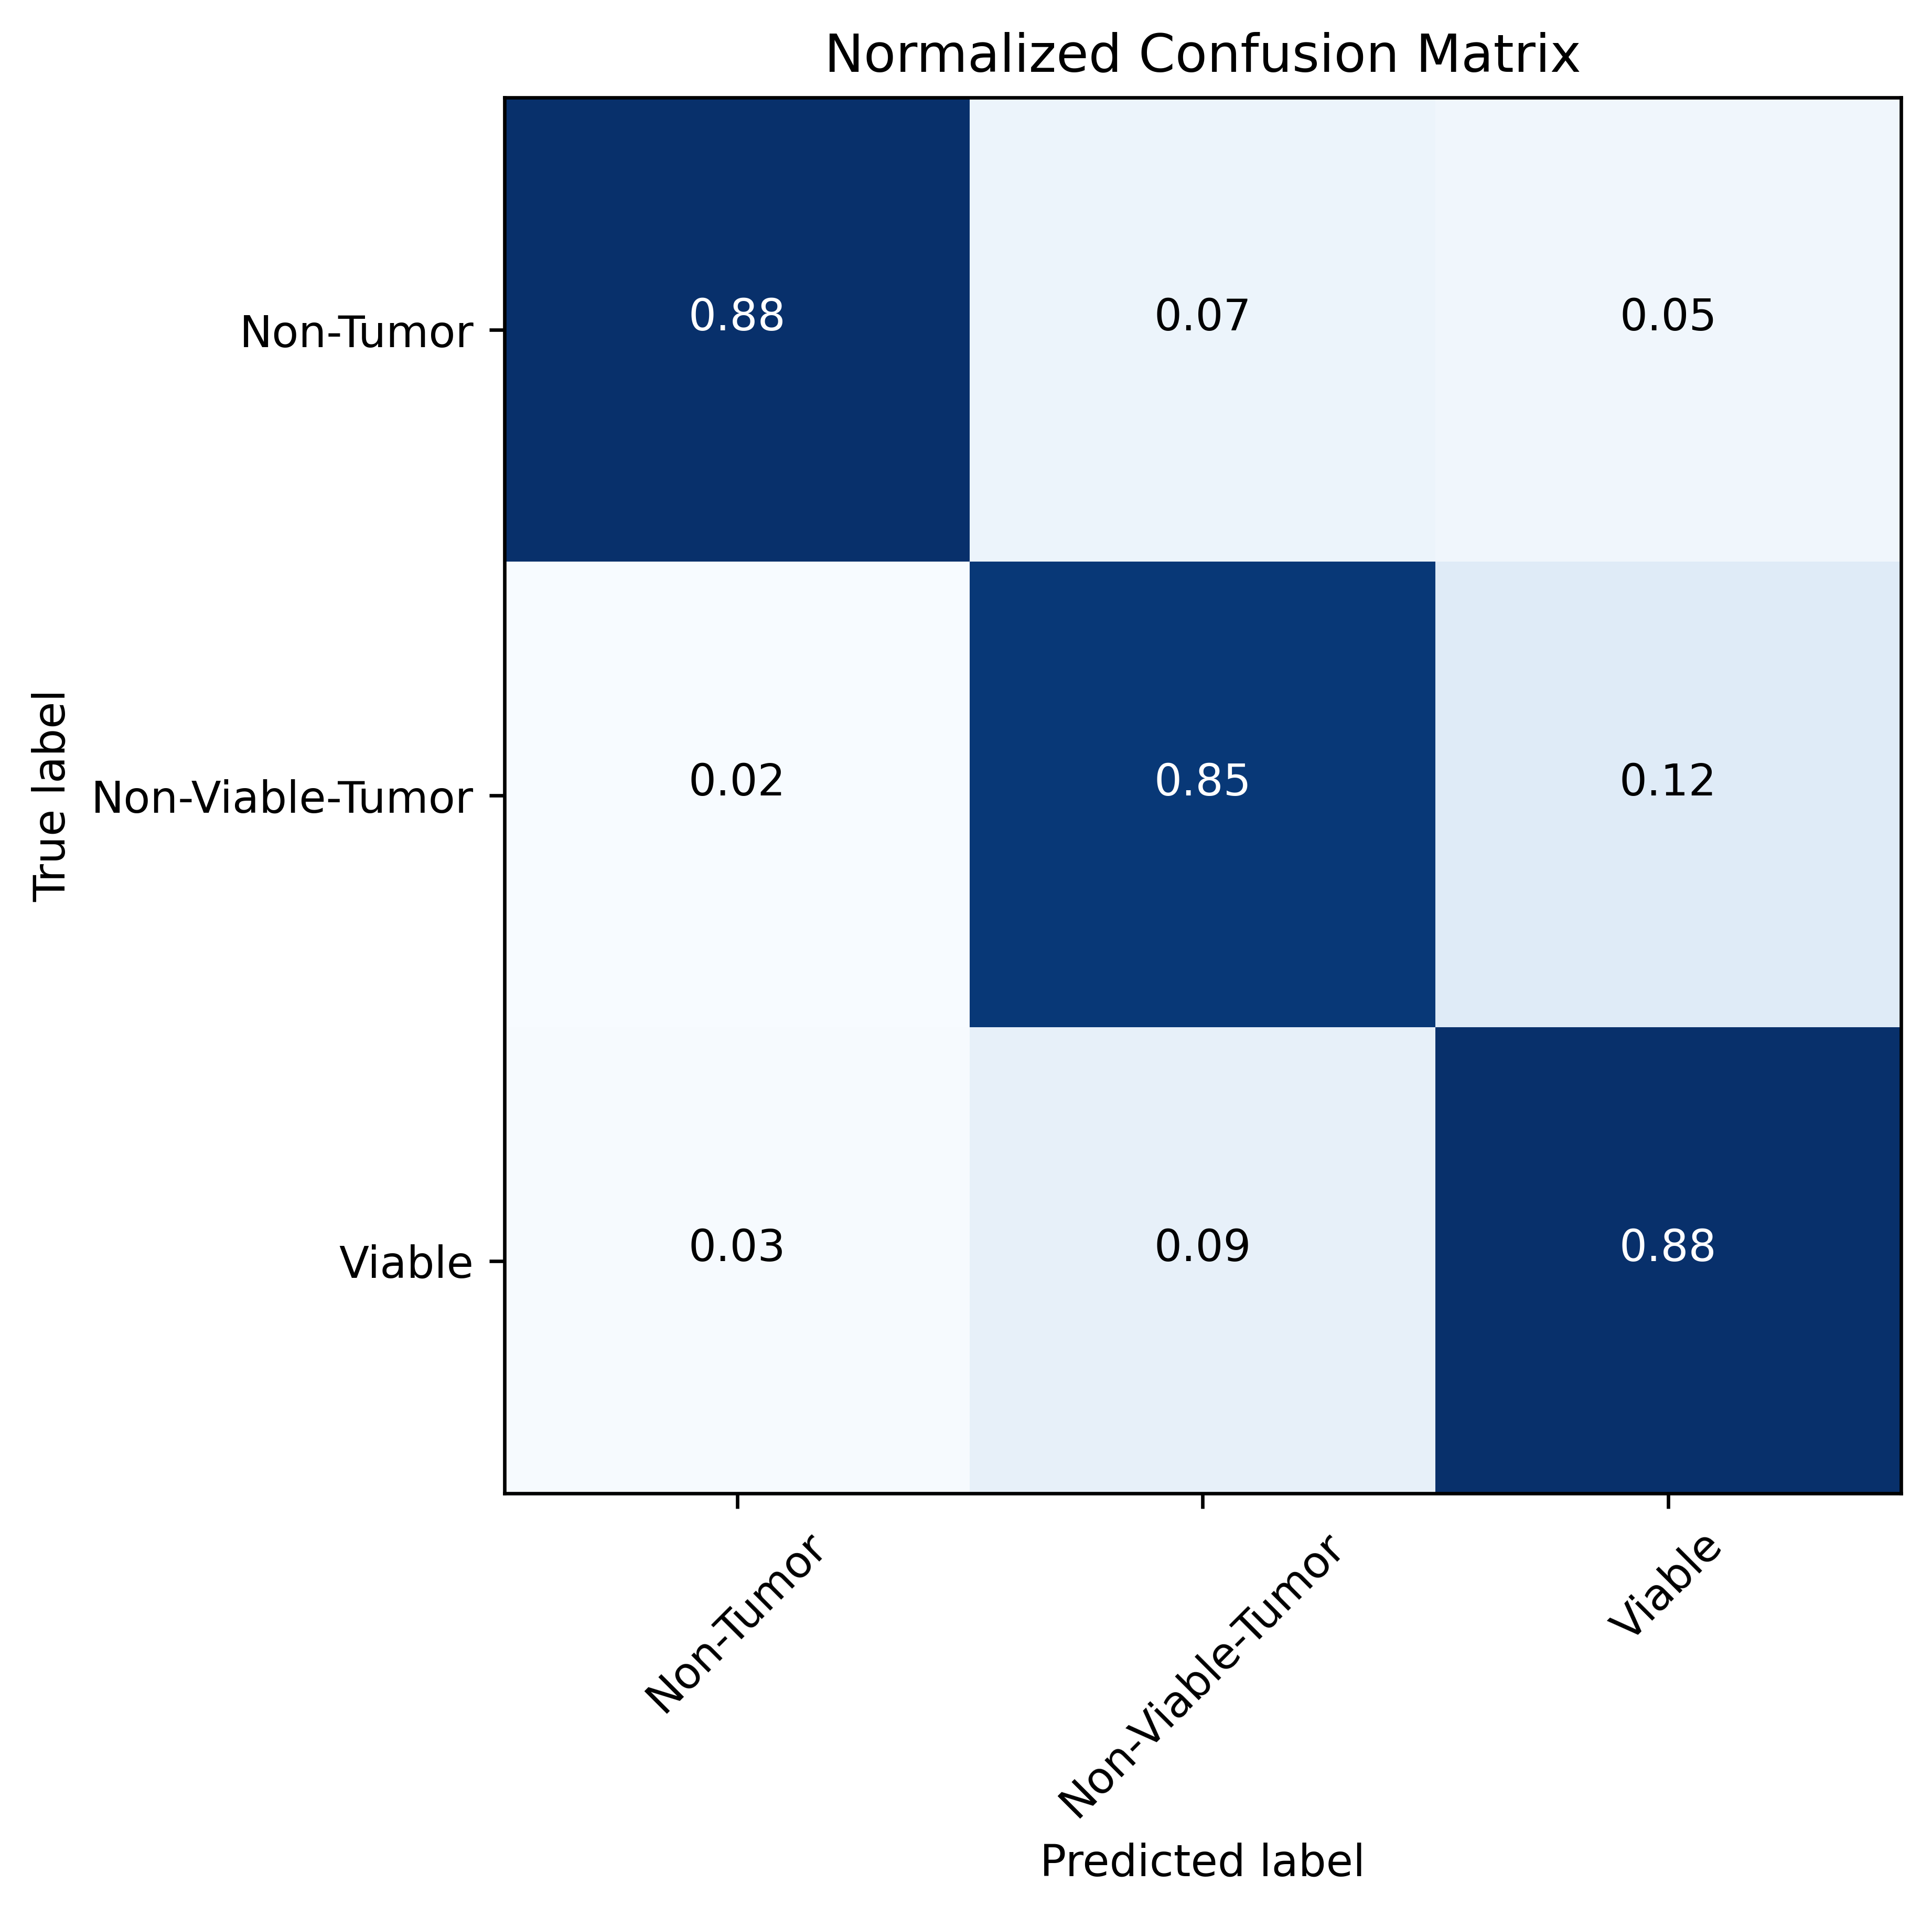

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes, normalize= True)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       103
           1       0.75      0.85      0.80        48
           2       0.86      0.88      0.87        77

    accuracy                           0.88       228
   macro avg       0.86      0.87      0.86       228
weighted avg       0.88      0.88      0.88       228



**calculating precision, recall(sensitivity), specificity by formula**

In [ ]:
c, tp, fp, tn, fn = perf_measure(y_test, svm_pred)

# for class 0
tp_0, fp_0, tn_0, fn_0 = tp[0], fp[0], tn[0], fn[0]

# precision= TP/(TP + FP)
precision_0 = tp_0 /(tp_0 + fp_0)
precision_0 = np.round(precision_0, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_0 = tp_0 / (tp_0 + fn_0)
recall_0 = np.round(recall_0, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_0 = tn_0 / (tn_0 + fp_0)
speci_0 = np.round(speci_0, 3)

#### for class 1
tp_1, fp_1, tn_1, fn_1 = tp[1], fp[1], tn[1], fn[1]

# precision= TP/(TP + FP)
precision_1 = tp_1 /(tp_1 + fp_1)
precision_1 = np.round(precision_1, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_1 = tp_1 / (tp_1 + fn_1)
recall_1 = np.round(recall_1, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_1 = tn_1 / (tn_1 + fp_1)
speci_1 = np.round(speci_1, 3)

### for class 2
tp_2, fp_2, tn_2, fn_2 = tp[2], fp[2], tn[2], fn[2]

# precision= TP/(TP + FP)
precision_2 = tp_2 /(tp_2 + fp_2)
precision_2 = np.round(precision_2, 3)

# recall (sensitivity) = TP/ (TP + FN)
recall_2 = tp_2 / (tp_2 + fn_2)
recall_2 = np.round(recall_2, 3)

# specificity(true negative rate) = TN / (TN + FP)
speci_2 = tn_2 / (tn_2 + fp_2)
speci_2 = np.round(speci_2, 3)

c_0, c_1, c_2 = 'Non-Tumor', 'Non-Viable-Tumor', 'Viable'
print("class \tclass_name \tprecision \tsensitivity(recall) \tspecificity ")
print('--------------------------------------------------------------------------')
print(str(0).center(5), c_0.center(15), str(precision_0).center(13), '\t',str(recall_0).center(15), '\t', str(speci_0).center(10))
print(str(1).center(5), c_1.center(15), str(precision_1).center(13), '\t',str(recall_1).center(15), '\t', str(speci_1).center(10))
print(str(2).center(5), c_2.center(15), str(precision_2).center(15), '\t',str(recall_2).center(15), '\t', str(speci_2).center(10))

class 	class_name 	precision 	sensitivity(recall) 	specificity 
--------------------------------------------------------------------------
  0      Non-Tumor        0.968     	      0.784      	   0.973   
  1   Non-Viable-Tumor     0.745     	      0.745      	   0.919   
  2        Viable          0.861      	       0.8       	   0.923   
